# Imports and Preprocessing

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
from PIL import Image, ImageOps
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
import pathlib
from google.colab import files
from google.colab import drive
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.applications import VGG16
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle as pkl
from IPython.display import clear_output
from time import sleep
import sys
import requests
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import warnings
import pickle
import gc
from statistics import median

In [2]:
warnings.filterwarnings('ignore')

In [3]:
print(tf.__version__)

2.4.1


In [4]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
!ls "/content/drive/My Drive/Capstone/anime/animated2"

cartoon_anger	 cartoon_surprise   imageset.npz		shinkai
cartoon_disgust  cartoon_test.csv   labelset.npz		tenthModel.h5
cartoon_fear	 cartoon_train.csv  MiniModel.h5		testimages.npz
cartoon_joy	 ck		    README.txt
cartoon_neutral  CK+48		    ResizedModelSingleEpoch.h5
cartoon_sadness  FullModel.h5	    Saved_Data


# Anger DataFrame

In [ ]:
anger = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_anger/*.png')
anger_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in anger]
anger_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in anger]
cartoon_anger = pd.DataFrame()
cartoon_anger["Directories"], cartoon_anger["Names"], cartoon_anger["Emotion"], cartoon_anger["Y"] = anger_directories, anger_names, "anger", 0   

In [ ]:
cartoon_anger

Directories  ...  Y
0     /content/drive/MyDrive/Capstone/anime/animated...  ...  0
1     /content/drive/MyDrive/Capstone/anime/animated...  ...  0
2     /content/drive/MyDrive/Capstone/anime/animated...  ...  0
3     /content/drive/MyDrive/Capstone/anime/animated...  ...  0
4     /content/drive/MyDrive/Capstone/anime/animated...  ...  0
...                                                 ...  ... ..
9173  /content/drive/MyDrive/Capstone/anime/animated...  ...  0
9174  /content/drive/MyDrive/Capstone/anime/animated...  ...  0
9175  /content/drive/MyDrive/Capstone/anime/animated...  ...  0
9176  /content/drive/MyDrive/Capstone/anime/animated...  ...  0
9177  /content/drive/MyDrive/Capstone/anime/animated...  ...  0

[9178 rows x 4 columns]

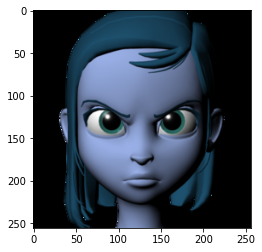

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_anger/aia_anger_1.png")
plt.imshow(img)

# Joy DataFrame

In [ ]:
joy = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_joy/*.png')
joy_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in joy]
joy_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in joy]
cartoon_joy = pd.DataFrame()
cartoon_joy["Directories"], cartoon_joy["Names"], cartoon_joy["Emotion"], cartoon_joy["Y"] = joy_directories, joy_names, "joy", 1    

In [ ]:
cartoon_joy

Directories  ...  Y
0     /content/drive/MyDrive/Capstone/anime/animated...  ...  1
1     /content/drive/MyDrive/Capstone/anime/animated...  ...  1
2     /content/drive/MyDrive/Capstone/anime/animated...  ...  1
3     /content/drive/MyDrive/Capstone/anime/animated...  ...  1
4     /content/drive/MyDrive/Capstone/anime/animated...  ...  1
...                                                 ...  ... ..
7333  /content/drive/MyDrive/Capstone/anime/animated...  ...  1
7334  /content/drive/MyDrive/Capstone/anime/animated...  ...  1
7335  /content/drive/MyDrive/Capstone/anime/animated...  ...  1
7336  /content/drive/MyDrive/Capstone/anime/animated...  ...  1
7337  /content/drive/MyDrive/Capstone/anime/animated...  ...  1

[7338 rows x 4 columns]

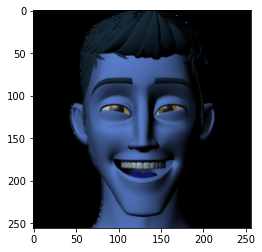

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_joy/jules_joy_1.png")
plt.imshow(img)

# Surprise DataFrame

In [ ]:
surprise = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_surprise/*.png')
surprise_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in surprise]
surprise_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in surprise]
cartoon_surprise = pd.DataFrame()
cartoon_surprise["Directories"], cartoon_surprise["Names"], cartoon_surprise["Emotion"], cartoon_surprise["Y"] = surprise_directories, surprise_names, "surprise", 2      

In [ ]:
cartoon_surprise

Directories  ...  Y
0     /content/drive/MyDrive/Capstone/anime/animated...  ...  2
1     /content/drive/MyDrive/Capstone/anime/animated...  ...  2
2     /content/drive/MyDrive/Capstone/anime/animated...  ...  2
3     /content/drive/MyDrive/Capstone/anime/animated...  ...  2
4     /content/drive/MyDrive/Capstone/anime/animated...  ...  2
...                                                 ...  ... ..
8730  /content/drive/MyDrive/Capstone/anime/animated...  ...  2
8731  /content/drive/MyDrive/Capstone/anime/animated...  ...  2
8732  /content/drive/MyDrive/Capstone/anime/animated...  ...  2
8733  /content/drive/MyDrive/Capstone/anime/animated...  ...  2
8734  /content/drive/MyDrive/Capstone/anime/animated...  ...  2

[8735 rows x 4 columns]

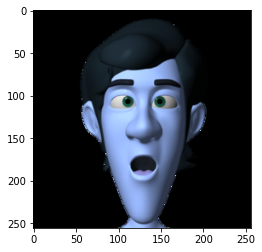

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_surprise/malcolm_surprise_1.png")
plt.imshow(img)

# Disgust DataFrame

In [ ]:
disgust = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_disgust/*.png')
disgust_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in disgust]
disgust_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in disgust]
cartoon_disgust = pd.DataFrame()
cartoon_disgust["Directories"], cartoon_disgust["Names"], cartoon_disgust["Emotion"], cartoon_disgust["Y"] = disgust_directories, disgust_names, "disgust", 3  

In [ ]:
cartoon_disgust

Directories  ...  Y
0     /content/drive/MyDrive/Capstone/anime/animated...  ...  3
1     /content/drive/MyDrive/Capstone/anime/animated...  ...  3
2     /content/drive/MyDrive/Capstone/anime/animated...  ...  3
3     /content/drive/MyDrive/Capstone/anime/animated...  ...  3
4     /content/drive/MyDrive/Capstone/anime/animated...  ...  3
...                                                 ...  ... ..
8580  /content/drive/MyDrive/Capstone/anime/animated...  ...  3
8581  /content/drive/MyDrive/Capstone/anime/animated...  ...  3
8582  /content/drive/MyDrive/Capstone/anime/animated...  ...  3
8583  /content/drive/MyDrive/Capstone/anime/animated...  ...  3
8584  /content/drive/MyDrive/Capstone/anime/animated...  ...  3

[8585 rows x 4 columns]

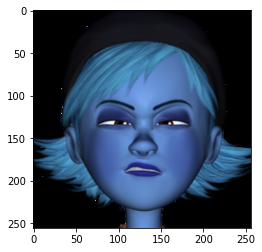

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_disgust/bonnie_disgust_1.png")
plt.imshow(img)

# Fear DataFrame

In [ ]:
fear = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_fear/*.png')
fear_names= [str(i)[::-1].split("/", 1)[0][::-1] for i in fear]
fear_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in fear]
cartoon_fear = pd.DataFrame()
cartoon_fear["Directories"], cartoon_fear["Names"], cartoon_fear["Emotion"], cartoon_fear["Y"] = fear_directories, fear_names, "fear", 4    

In [ ]:
cartoon_fear

Directories  ...  Y
0     /content/drive/MyDrive/Capstone/anime/animated...  ...  4
1     /content/drive/MyDrive/Capstone/anime/animated...  ...  4
2     /content/drive/MyDrive/Capstone/anime/animated...  ...  4
3     /content/drive/MyDrive/Capstone/anime/animated...  ...  4
4     /content/drive/MyDrive/Capstone/anime/animated...  ...  4
...                                                 ...  ... ..
7425  /content/drive/MyDrive/Capstone/anime/animated...  ...  4
7426  /content/drive/MyDrive/Capstone/anime/animated...  ...  4
7427  /content/drive/MyDrive/Capstone/anime/animated...  ...  4
7428  /content/drive/MyDrive/Capstone/anime/animated...  ...  4
7429  /content/drive/MyDrive/Capstone/anime/animated...  ...  4

[7430 rows x 4 columns]

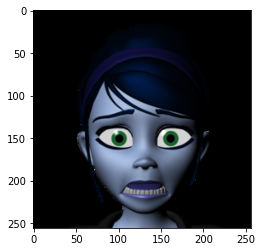

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_fear/mery_fear_1.png")
plt.imshow(img)

# Sadness DataFrame

In [ ]:
sadness = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_sadness/*.png')
sadness_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in sadness]
sadness_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in sadness]
cartoon_sadness = pd.DataFrame()
cartoon_sadness["Directories"], cartoon_sadness["Names"], cartoon_sadness["Emotion"], cartoon_sadness["Y"] = sadness_directories, sadness_names, "sadness", 5

In [ ]:
cartoon_sadness

Directories  ...  Y
0     /content/drive/MyDrive/Capstone/anime/animated...  ...  5
1     /content/drive/MyDrive/Capstone/anime/animated...  ...  5
2     /content/drive/MyDrive/Capstone/anime/animated...  ...  5
3     /content/drive/MyDrive/Capstone/anime/animated...  ...  5
4     /content/drive/MyDrive/Capstone/anime/animated...  ...  5
...                                                 ...  ... ..
7631  /content/drive/MyDrive/Capstone/anime/animated...  ...  5
7632  /content/drive/MyDrive/Capstone/anime/animated...  ...  5
7633  /content/drive/MyDrive/Capstone/anime/animated...  ...  5
7634  /content/drive/MyDrive/Capstone/anime/animated...  ...  5
7635  /content/drive/MyDrive/Capstone/anime/animated...  ...  5

[7636 rows x 4 columns]

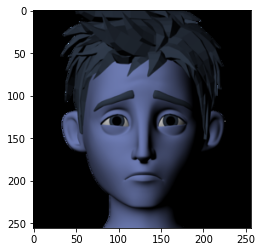

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_sadness/ray_sadness_1.png")
plt.imshow(img)

# Neutral DataFrame

In [ ]:
neutral = glob.glob('/content/drive/MyDrive/Capstone/anime/animated2/cartoon_neutral/*.png')
neutral_names = [str(i)[::-1].split("/", 1)[0][::-1] for i in neutral]
neutral_directories = [str(i)[::-1].split("/", 1)[1][::-1] for i in neutral]
cartoon_neutral = pd.DataFrame()
cartoon_neutral["Directories"], cartoon_neutral["Names"], cartoon_neutral["Emotion"], cartoon_neutral["Y"] = neutral_directories, neutral_names, "neutral", 6 

In [ ]:
cartoon_neutral

Directories  ...  Y
0     /content/drive/MyDrive/Capstone/anime/animated...  ...  6
1     /content/drive/MyDrive/Capstone/anime/animated...  ...  6
2     /content/drive/MyDrive/Capstone/anime/animated...  ...  6
3     /content/drive/MyDrive/Capstone/anime/animated...  ...  6
4     /content/drive/MyDrive/Capstone/anime/animated...  ...  6
...                                                 ...  ... ..
6945  /content/drive/MyDrive/Capstone/anime/animated...  ...  6
6946  /content/drive/MyDrive/Capstone/anime/animated...  ...  6
6947  /content/drive/MyDrive/Capstone/anime/animated...  ...  6
6948  /content/drive/MyDrive/Capstone/anime/animated...  ...  6
6949  /content/drive/MyDrive/Capstone/anime/animated...  ...  6

[6950 rows x 4 columns]

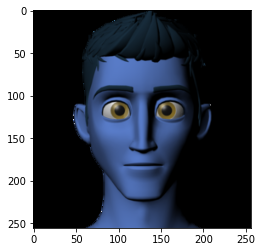

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_neutral/jules_neutral_1.png")
plt.imshow(img)

# Concatenating all dataframes -> Cartoon DataFrame

In [6]:
cartoon = pd.concat([cartoon_anger, cartoon_joy, cartoon_surprise, cartoon_disgust, cartoon_fear, cartoon_sadness, cartoon_neutral])

NameError: ignored

In [ ]:
cartoon

In [ ]:
#Train test split
cartoon_train, cartoon_test = train_test_split(cartoon, stratify=cartoon["Y"], test_size = 0.2)

In [ ]:
cartoon_train

# Loading Saved DataFrames

In [6]:
# cartoon_train.to_csv("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_train.csv")
# cartoon_test.to_csv("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_test.csv")

In [7]:
cartoon_train = pd.read_csv("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_train.csv")
cartoon_test = pd.read_csv("/content/drive/MyDrive/Capstone/anime/animated2/cartoon_test.csv")

In [8]:
cartoon_train["Y"].value_counts()

0    7342
2    6988
3    6868
5    6109
4    5944
1    5870
6    5560
Name: Y, dtype: int64

In [9]:
df = cartoon_train.sample(frac = 1)
df = df.reset_index()
df

index  Unnamed: 0  ...   Emotion  Y
0      24922        1831  ...  surprise  2
1      24073         180  ...  surprise  2
2      30819        6977  ...       joy  1
3      15043        5674  ...       joy  1
4      35761        4509  ...  surprise  2
...      ...         ...  ...       ... ..
44676  20147         638  ...   disgust  3
44677  27375        6691  ...   neutral  6
44678   9902        1870  ...   neutral  6
44679  18218        4837  ...       joy  1
44680  36814        5814  ...      fear  4

[44681 rows x 6 columns]

# Model Configuration and Training

In [10]:
def get_models():
  model_bottleneck = VGG16(weights='imagenet', include_top=False)
  model_cartoon = load_model("/content/drive/MyDrive/Capstone/anime/animated2/ResizedModelSingleEpoch.h5")
  model_cartoon.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
  
  return model_bottleneck, model_cartoon

In [11]:
# Transfer learning -> Using pretrained VGG with imagenet weights. Fine tuning to be done with cartoon images

In [12]:
batch_size = 20 # Stream and train batches of 20 images at once. Cannot load entire dataset into limited RAM
ishape = 8*8*512 # Shape of VGG output

In [13]:
# Train model for 1 epoch. Time taken ~ 3 hours

In [14]:
modelvgg = Sequential()
modelvgg.add(Flatten())
modelvgg.add(Dense(512, activation='relu', input_shape = (ishape, )))
modelvgg.add(Dropout(0.2))
modelvgg.add(Dense(256, activation='relu'))
modelvgg.add(Dense(128, activation='relu'))
modelvgg.add(BatchNormalization())
modelvgg.add(Dense(64, activation='relu'))
modelvgg.add(Dense(7, activation='softmax')) 
modelvgg.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [15]:
# for i in range(int(len(df)/batch_size)):
#   try:
#     print("Training on batch " +str(i+1))
#     temp_df = df[i*batch_size:(i+1)*batch_size]
#     images, labels = get_cartoon_images_and_labels(temp_df)
#     images = convert_cartoon_grayscale(resize_cartoon_images(images))
#     predictions = model.predict(images)
#     modelvgg.train_on_batch(np.asarray(predictions), labels)
#     del images
#     del labels
#     del temp_df
#   except:
#     print("Error on batch " + str(i+1))

In [16]:
# Accuracy here is 100%, but our end goal is to obtain a better accuracy on human images.
# modelvgg.save("/content/drive/MyDrive/Capstone/anime/animated2/ResizedModelSingleEpoch.h5")
# Load saved model from drive and test accuracy = 100%

# Image preprocessing

In [17]:
def get_human_paths():
  human_anger_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/anger/*.png")
  df0 = pd.DataFrame({'Path':human_anger_paths, 'Label':[0 for i in human_anger_paths]})
  human_disgust_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/disgust/*.png")
  df3 = pd.DataFrame({'Path':human_disgust_paths, 'Label':[3 for i in human_disgust_paths]})
  human_fear_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/fear/*.png")
  df4 = pd.DataFrame({'Path':human_fear_paths, 'Label':[4 for i in human_fear_paths]})
  human_sadness_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/sadness/*.png")
  df5 = pd.DataFrame({'Path':human_sadness_paths, 'Label':[5 for i in human_sadness_paths]})
  human_joy_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/happy/*.png")
  df1 = pd.DataFrame({'Path':human_joy_paths, 'Label':[1 for i in human_joy_paths]})
  human_surprise_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/CK+48/surprise/*.png")
  df2 = pd.DataFrame({'Path':human_surprise_paths, 'Label':[2 for i in human_surprise_paths]})
  human_paths = human_anger_paths + human_disgust_paths + human_fear_paths + human_joy_paths + human_sadness_paths + human_surprise_paths
  human_df = pd.concat([df0, df1, df2, df3, df4, df5]).reset_index()

  return human_paths, human_df

In [18]:
def get_cartoon_images_and_labels(temp_df, integer_labels = False):
  paths = [i+"/"+j for i,j in zip(temp_df["Directories"].tolist(), temp_df["Names"].tolist())]
  images = np.asarray([np.asarray(Image.open(image))[:, :, :3] for image in paths])
  labels = np.asarray(temp_df["Y"].tolist())
  labels = to_categorical(labels, num_classes=7)
  integerLabels = np.asarray([np.argmax(label) for label in labels])

  if (integer_labels):
    return images, labels, integerLabels
  else:
    return images, labels

In [19]:
def resize_cartoon_images(images):
  clipped_images = [image[40:240, 35:225] for image in images]
  resized_clipped_images = [cv2.resize(clipped_image, (256, 256)) for clipped_image in clipped_images]
  return np.asarray(resized_clipped_images)

In [20]:
def convert_cartoon_grayscale(images):
  return np.asarray([np.asarray(ImageOps.grayscale(Image.fromarray(image)).convert("RGB")) for image in images])

In [21]:
def display_images(images):
  for image in images:
    display(Image.fromarray(image))
    print()

In [22]:
def get_human_cartoonized_images(human_ct_df, integer_labels = False, augment = False):
  paths = human_ct_df["Path"]
  if (augment):
    human_ct_images = np.concatenate((np.asarray([np.fliplr(np.asarray(ImageOps.grayscale(Image.open(path)).convert("RGB"))) for path in paths]), np.asarray([np.asarray(ImageOps.grayscale(Image.open(path)).convert("RGB")) for path in paths])), axis = 0)
    human_ct_labels = np.concatenate((np.asarray(human_ct_df["Label"].tolist()), np.asarray(human_ct_df["Label"].tolist())), axis = 0)
    human_ct_labels = np.asarray(to_categorical(human_ct_labels, num_classes=7))
  else:
    human_ct_images = np.asarray([np.asarray(ImageOps.grayscale(Image.open(path)).convert("RGB")) for path in paths])
    human_ct_labels = np.asarray(human_ct_df["Label"].tolist())
    human_ct_labels = np.asarray(to_categorical(human_ct_labels, num_classes=7))

  integerLabels = np.asarray([np.argmax(label) for label in human_ct_labels])

  if (integer_labels):
    return human_ct_images, human_ct_labels, integerLabels
  else:
    return human_ct_images, human_ct_labels

In [23]:
def get_human_images(human_df, integer_labels = False):
  paths = human_df["Path"]
  human_images = np.asarray([cv2.resize(np.asarray(Image.open(path).convert("RGB")), (256, 256)) for path in paths])
  human_labels = np.asarray(human_df["Label"].tolist())
  human_labels = np.asarray(to_categorical(human_labels, num_classes=7))
  integerLabels = np.asarray([np.argmax(label) for label in human_labels])

  if (integer_labels):
    return human_images, human_labels, integerLabels
  else:
    return human_images, human_labels

In [24]:
def train_human(model_bottleneck, model_cartoon, human_images, human_labels, epochs, lr = 0.1):
  human_bottleneck = np.asarray(model_bottleneck.predict(human_images))

  for epoch in range(epochs):
    #print("Training epoch " + str(epoch+1))
    for i in range(len(human_bottleneck)//20):
      model_cartoon.train_on_batch(human_bottleneck[20*i:20*(i+1)], human_labels[20*i:20*(i+1)])
  
  return model_cartoon

In [25]:
def get_human_cartoonized_paths():
  human_anger_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/0*.png")
  df0 = pd.DataFrame({'Path':human_anger_paths, 'Label':[0 for i in human_anger_paths]})
  human_disgust_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/3*.png")
  df3 = pd.DataFrame({'Path':human_disgust_paths, 'Label':[3 for i in human_disgust_paths]})
  human_fear_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/4*.png")
  df4 = pd.DataFrame({'Path':human_fear_paths, 'Label':[4 for i in human_fear_paths]})
  human_sadness_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/5*.png")
  df5 = pd.DataFrame({'Path':human_sadness_paths, 'Label':[5 for i in human_sadness_paths]})
  human_joy_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/1*.png")
  df1 = pd.DataFrame({'Path':human_joy_paths, 'Label':[1 for i in human_joy_paths]})
  human_surprise_paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/shinkai/2*.png")
  df2 = pd.DataFrame({'Path':human_surprise_paths, 'Label':[2 for i in human_surprise_paths]})
  human_paths = human_anger_paths + human_disgust_paths + human_fear_paths + human_joy_paths + human_sadness_paths + human_surprise_paths
  human_df = pd.concat([df0, df1, df2, df3, df4, df5]).reset_index()

  return human_paths, human_df

# Accuracy Testing

In [26]:
def test_cartoon_accuracy(model_bottleneck, model_test, temp_df, display_image = True):
  temp_df = temp_df.reset_index()
  images, labels = get_cartoon_images_and_labels(temp_df)
  images = convert_cartoon_grayscale(resize_cartoon_images(images))
  bottleneck_features = model_bottleneck.predict(images)
  predictions = model_test.predict_classes(bottleneck_features)
  probabilities = model_test.predict(bottleneck_features)

  key = {0:"anger", 1:"joy", 2:"surprise", 3:"disgust", 4:"fear", 5:"sadness", 6:"neutral"}
  integerLabels = np.asarray([np.argmax(label) for label in labels])

  for index, image in list(enumerate(images)):
    if(display_image):
      display(Image.fromarray(image))
      print()
      print(temp_df["Names"][index])
      print("Predicted Class: " + str(key[predictions[index]]))
      print("Confidence in Prediction: " + str(np.max(probabilities[index])))
      print("Actual Class: " + str(key[integerLabels[index]]))
      print("__________________________________________________\n")

  accuracy = accuracy_score(integerLabels, predictions)
  metrics = precision_recall_fscore_support(integerLabels, predictions, average='weighted')
  confusion = confusion_matrix(integerLabels, predictions)

  return predictions, probabilities, accuracy, metrics, confusion

In [27]:
def test_human_accuracy(model_bottleneck, model_test, human_df, display_image = True):
  human_df = human_df.reset_index()
  human_images, human_labels = get_human_images(human_df)
  test_human_bottleneck =  np.asarray(model_bottleneck.predict(human_images))
  predictions = model_test.predict_classes(test_human_bottleneck)
  probabilities = model_test.predict(test_human_bottleneck)

  key = {0:"anger", 1:"joy", 2:"surprise", 3:"disgust", 4:"fear", 5:"sadness", 6:"neutral"}
  integerLabels = np.asarray([np.argmax(label) for label in human_labels])

  for index, image in list(enumerate(human_images)):
    if(display_image):
      display(Image.fromarray(image))
      print()
      print("Predicted Class: " + str(key[predictions[index]]))
      print("Confidence in Prediction: " + str(np.max(probabilities[index])))
      print("Actual Class: " + str(key[integerLabels[index]]))
      print("__________________________________________________\n")

  accuracy = accuracy_score(integerLabels, predictions)
  metrics = precision_recall_fscore_support(integerLabels, predictions, average='weighted')
  confusion = confusion_matrix(integerLabels, predictions)

  return predictions, probabilities, accuracy, metrics, confusion

In [28]:
def test_human_cartoonized_accuracy(model_bottleneck, model_test, human_ct_df, display_image = True, augment = False):
  human_ct_df = human_ct_df.reset_index()
  if (augment):
    human_ct_images, human_ct_labels = get_human_cartoonized_images(human_ct_df, augment = True)
  else:
    human_ct_images, human_ct_labels = get_human_cartoonized_images(human_ct_df)
  test_human_bottleneck =  np.asarray(model_bottleneck.predict(human_ct_images))
  predictions = model_test.predict_classes(test_human_bottleneck)
  probabilities = model_test.predict(test_human_bottleneck)

  key = {0:"anger", 1:"joy", 2:"surprise", 3:"disgust", 4:"fear", 5:"sadness", 6:"neutral"}
  integerLabels = np.asarray([np.argmax(label) for label in human_ct_labels])

  for index, image in list(enumerate(human_ct_images)):
    if(display_image):
      display(Image.fromarray(image))
      print()
      print("Predicted Class: " + str(key[predictions[index]]))
      print("Confidence in Prediction: " + str(np.max(probabilities[index])))
      print("Actual Class: " + str(key[integerLabels[index]]))
      print("__________________________________________________\n")

  accuracy = accuracy_score(integerLabels, predictions)
  metrics = precision_recall_fscore_support(integerLabels, predictions, average='weighted')
  confusion = confusion_matrix(integerLabels, predictions)

  return predictions, probabilities, accuracy, metrics, confusion

# Future Work

In [29]:
# Dataset Used - FERG-DB

# To do Tasks:
# 1) Implement K-fold cross validation
# 2) Cartoonize human images
# 3) Test Model on cartoonized human images
# 4) Enable live face tracking and cartoonization using openCV
# 5) Test effects of image augmentation
#       - Geographic Transformations
#       - Flipping sideways
#       - Colour Transformations
#       - Cropping measures
# 6) Track how model performs on human images at different levels of available data (10 images, 100 images, 1000 images, complete dataset, etc.)
# 7) Experiment with other bottleneck feature extractors than the VGG - Residual Networks, Inception Networks, DenseNets, etc.

In [30]:
# 17 - train with cropped faces with animated and then with human
# 18 - use basic cartoonization on human images and test accuracies
# 19, 20 - get final accuracies somehow and begin research paper
# 21, 22 - implement opencv functionality

In [31]:
# 25 - cartoonize cohn kanade dataset with cgan
# 26 - Write functions to implement kfold, get accuracies for different data percentages, different augmentation techniques(flip image), and number of epochs
# 27 - complete base research paper
# 28 - format final research paper
# 29 - opencv implementation
# 30 - 

# Experimental

In [ ]:
test_df = cartoon_test.sample(frac = 0.01)

In [ ]:
test_df.shape

(112, 5)

In [ ]:
model_bottleneck, model_cartoon = get_models()

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
predictions, probabilities, accuracy, metrics, confusion = test_cartoon_accuracy(model_bottleneck, model_cartoon, test_df, display_image = False)

In [ ]:
metrics

(1.0, 1.0, 1.0, None)

In [ ]:
accuracy

1.0

In [ ]:
human_paths, human_df = get_human_paths()
human_images, human_labels = get_human_images(human_df)
human_images_ct, human_labels_ct = get_human_cartoonized_images(human_ct_df)

In [ ]:
human_train, human_test = train_test_split(human_df, stratify = human_df["Label"], test_size = 0.2)

In [ ]:
human_images_train, human_labels_train = get_human_images(human_train)
human_images_test, human_labels_test = get_human_images(human_test)

In [ ]:
model_cartoon = train_human(model_bottleneck, model_cartoon, human_images_train, human_labels_train, epochs = 10)

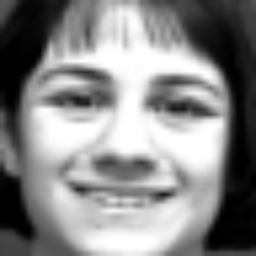


Predicted Class: joy
Confidence in Prediction: 0.9998771
Actual Class: joy
__________________________________________________



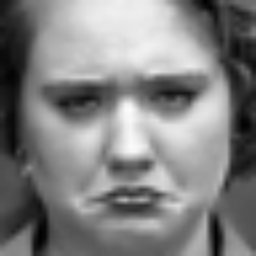


Predicted Class: sadness
Confidence in Prediction: 0.9994299
Actual Class: sadness
__________________________________________________



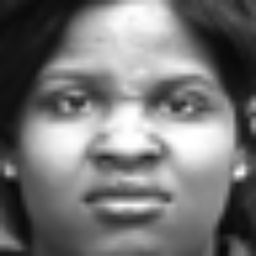


Predicted Class: disgust
Confidence in Prediction: 0.99987984
Actual Class: disgust
__________________________________________________



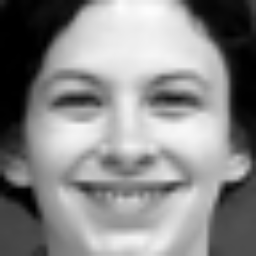


Predicted Class: joy
Confidence in Prediction: 0.999987
Actual Class: joy
__________________________________________________



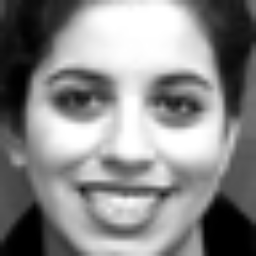


Predicted Class: joy
Confidence in Prediction: 0.99999595
Actual Class: joy
__________________________________________________



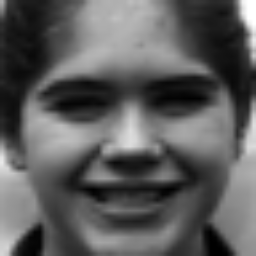


Predicted Class: joy
Confidence in Prediction: 0.9999577
Actual Class: joy
__________________________________________________



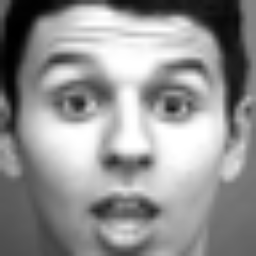


Predicted Class: surprise
Confidence in Prediction: 0.99997663
Actual Class: surprise
__________________________________________________



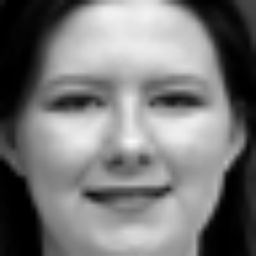


Predicted Class: joy
Confidence in Prediction: 0.9998573
Actual Class: joy
__________________________________________________



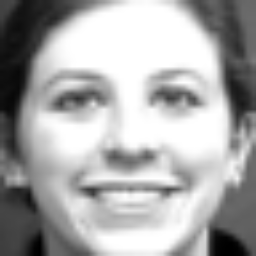


Predicted Class: joy
Confidence in Prediction: 0.99997926
Actual Class: joy
__________________________________________________



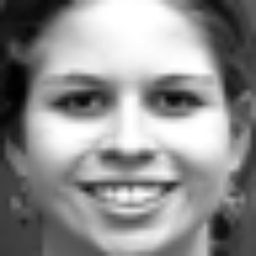


Predicted Class: joy
Confidence in Prediction: 0.99999094
Actual Class: joy
__________________________________________________



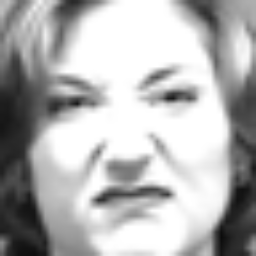


Predicted Class: disgust
Confidence in Prediction: 0.9999125
Actual Class: disgust
__________________________________________________



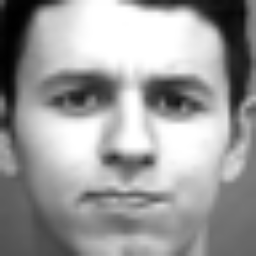


Predicted Class: anger
Confidence in Prediction: 0.98932344
Actual Class: anger
__________________________________________________



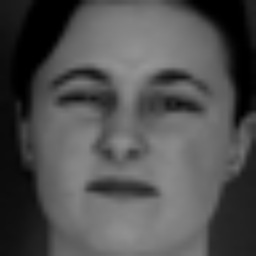


Predicted Class: disgust
Confidence in Prediction: 0.9983645
Actual Class: disgust
__________________________________________________



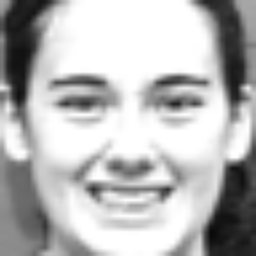


Predicted Class: joy
Confidence in Prediction: 0.9999242
Actual Class: joy
__________________________________________________



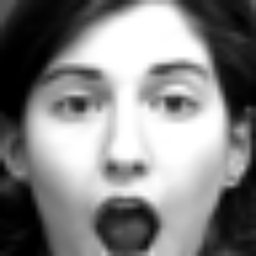


Predicted Class: surprise
Confidence in Prediction: 0.99996245
Actual Class: surprise
__________________________________________________



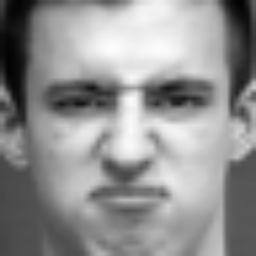


Predicted Class: disgust
Confidence in Prediction: 0.999824
Actual Class: disgust
__________________________________________________



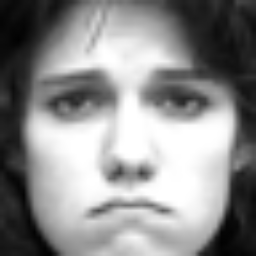


Predicted Class: sadness
Confidence in Prediction: 0.99997914
Actual Class: sadness
__________________________________________________



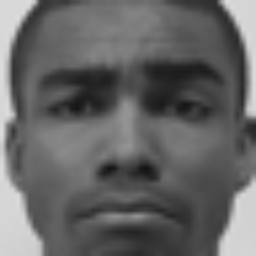


Predicted Class: sadness
Confidence in Prediction: 0.9987907
Actual Class: sadness
__________________________________________________



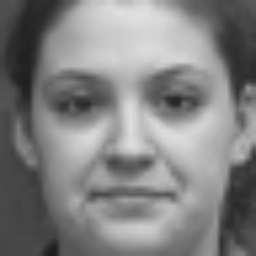


Predicted Class: surprise
Confidence in Prediction: 0.99647397
Actual Class: surprise
__________________________________________________



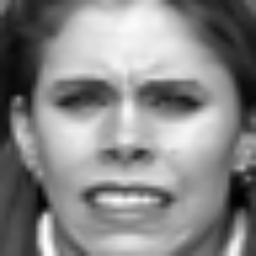


Predicted Class: fear
Confidence in Prediction: 0.99980706
Actual Class: fear
__________________________________________________



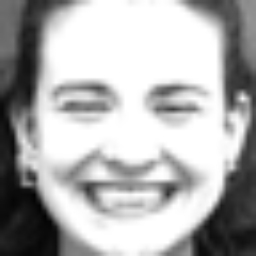


Predicted Class: joy
Confidence in Prediction: 0.99995947
Actual Class: joy
__________________________________________________



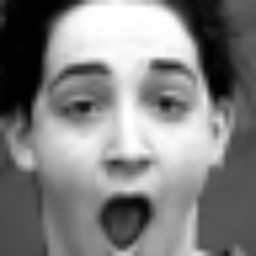


Predicted Class: surprise
Confidence in Prediction: 0.99997747
Actual Class: surprise
__________________________________________________



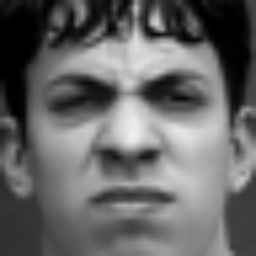


Predicted Class: disgust
Confidence in Prediction: 0.99993384
Actual Class: disgust
__________________________________________________



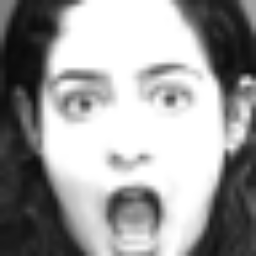


Predicted Class: surprise
Confidence in Prediction: 0.99997556
Actual Class: surprise
__________________________________________________



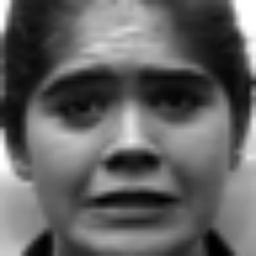


Predicted Class: fear
Confidence in Prediction: 0.9994192
Actual Class: fear
__________________________________________________



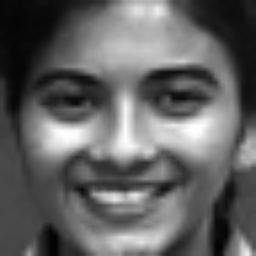


Predicted Class: joy
Confidence in Prediction: 0.9999943
Actual Class: joy
__________________________________________________



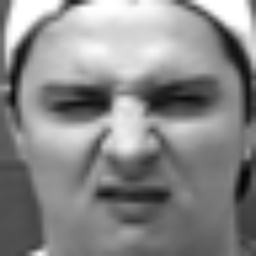


Predicted Class: disgust
Confidence in Prediction: 0.99893993
Actual Class: disgust
__________________________________________________



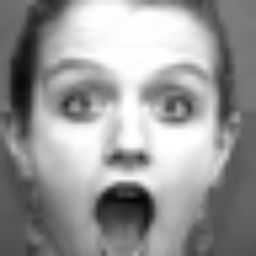


Predicted Class: surprise
Confidence in Prediction: 0.99999034
Actual Class: surprise
__________________________________________________



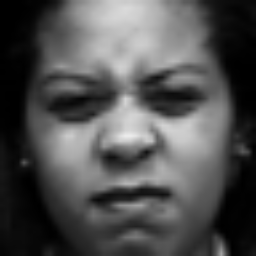


Predicted Class: disgust
Confidence in Prediction: 0.9993655
Actual Class: disgust
__________________________________________________



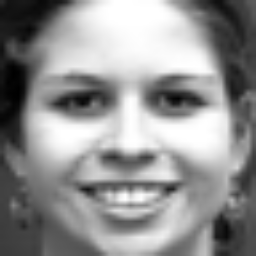


Predicted Class: joy
Confidence in Prediction: 0.9999914
Actual Class: joy
__________________________________________________



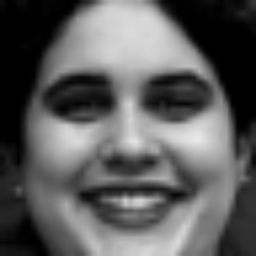


Predicted Class: joy
Confidence in Prediction: 0.99991536
Actual Class: joy
__________________________________________________



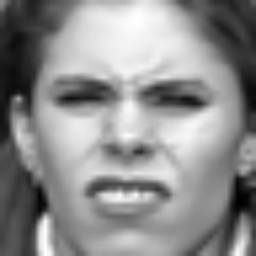


Predicted Class: disgust
Confidence in Prediction: 0.99260545
Actual Class: disgust
__________________________________________________



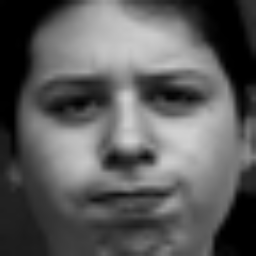


Predicted Class: anger
Confidence in Prediction: 0.99786323
Actual Class: anger
__________________________________________________



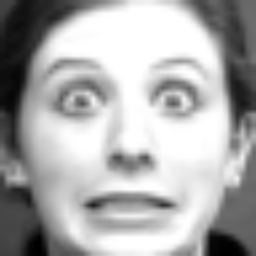


Predicted Class: fear
Confidence in Prediction: 0.9999974
Actual Class: fear
__________________________________________________



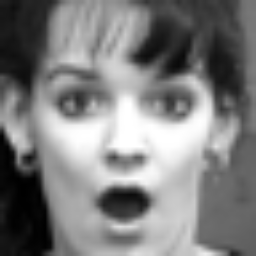


Predicted Class: surprise
Confidence in Prediction: 0.99999654
Actual Class: surprise
__________________________________________________



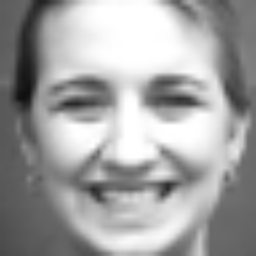


Predicted Class: joy
Confidence in Prediction: 0.9999788
Actual Class: joy
__________________________________________________



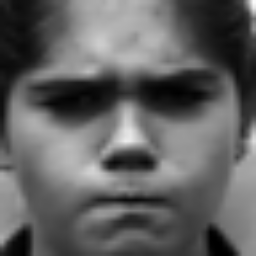


Predicted Class: anger
Confidence in Prediction: 0.9998172
Actual Class: anger
__________________________________________________



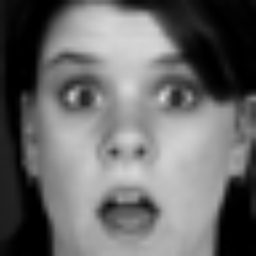


Predicted Class: surprise
Confidence in Prediction: 0.99996746
Actual Class: surprise
__________________________________________________



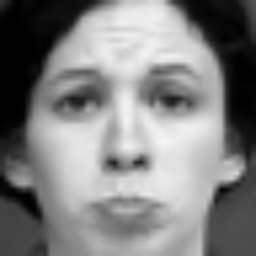


Predicted Class: sadness
Confidence in Prediction: 0.99996924
Actual Class: sadness
__________________________________________________



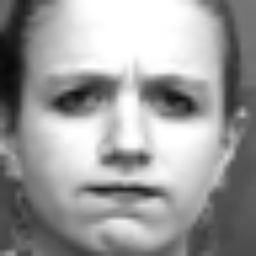


Predicted Class: anger
Confidence in Prediction: 0.9998135
Actual Class: anger
__________________________________________________



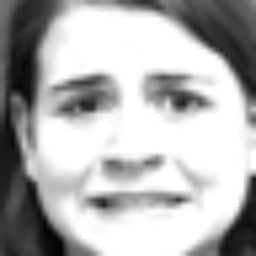


Predicted Class: fear
Confidence in Prediction: 0.9378142
Actual Class: fear
__________________________________________________



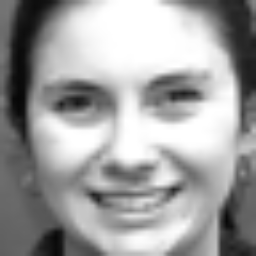


Predicted Class: joy
Confidence in Prediction: 0.9999918
Actual Class: joy
__________________________________________________



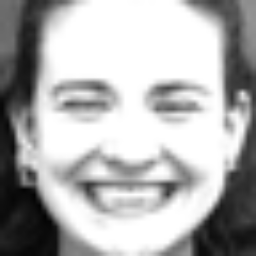


Predicted Class: joy
Confidence in Prediction: 0.9999738
Actual Class: joy
__________________________________________________



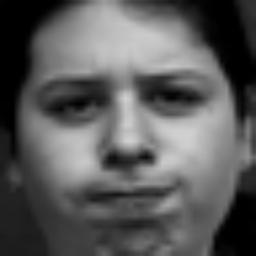


Predicted Class: anger
Confidence in Prediction: 0.9978023
Actual Class: anger
__________________________________________________



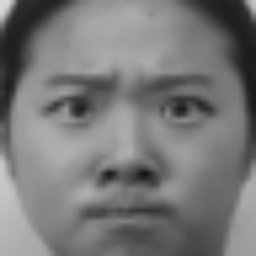


Predicted Class: anger
Confidence in Prediction: 0.9913173
Actual Class: anger
__________________________________________________



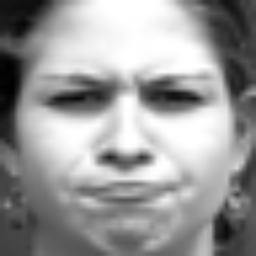


Predicted Class: anger
Confidence in Prediction: 0.99688715
Actual Class: anger
__________________________________________________



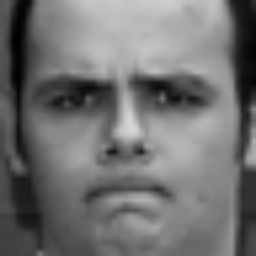


Predicted Class: anger
Confidence in Prediction: 0.9997392
Actual Class: anger
__________________________________________________



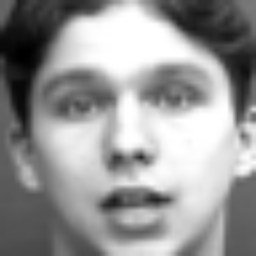


Predicted Class: surprise
Confidence in Prediction: 0.9980094
Actual Class: surprise
__________________________________________________



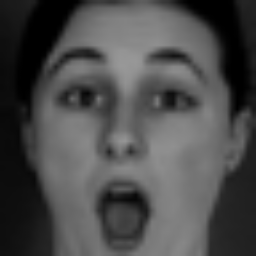


Predicted Class: surprise
Confidence in Prediction: 0.99834216
Actual Class: surprise
__________________________________________________



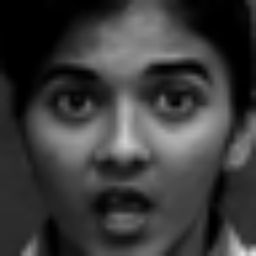


Predicted Class: surprise
Confidence in Prediction: 0.99991584
Actual Class: surprise
__________________________________________________



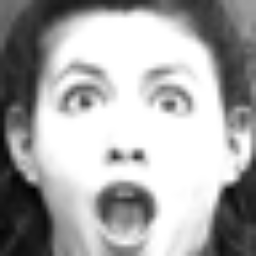


Predicted Class: surprise
Confidence in Prediction: 0.99999535
Actual Class: surprise
__________________________________________________



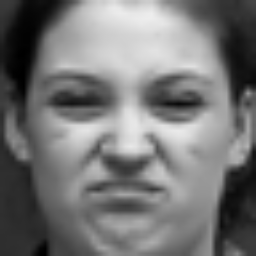


Predicted Class: disgust
Confidence in Prediction: 0.998334
Actual Class: disgust
__________________________________________________



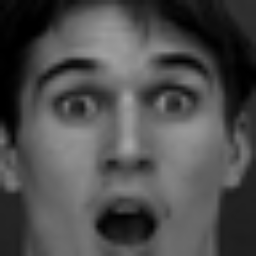


Predicted Class: surprise
Confidence in Prediction: 0.99991286
Actual Class: surprise
__________________________________________________



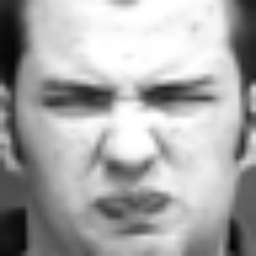


Predicted Class: disgust
Confidence in Prediction: 0.99995756
Actual Class: disgust
__________________________________________________



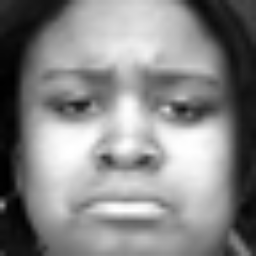


Predicted Class: sadness
Confidence in Prediction: 0.95668596
Actual Class: sadness
__________________________________________________



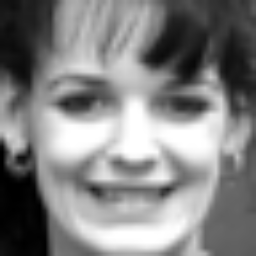


Predicted Class: joy
Confidence in Prediction: 0.99999726
Actual Class: joy
__________________________________________________



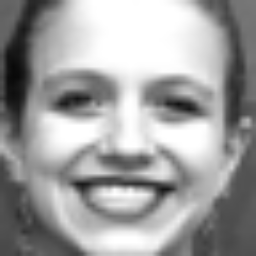


Predicted Class: joy
Confidence in Prediction: 0.9999963
Actual Class: joy
__________________________________________________



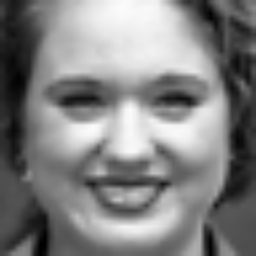


Predicted Class: joy
Confidence in Prediction: 0.9999927
Actual Class: joy
__________________________________________________



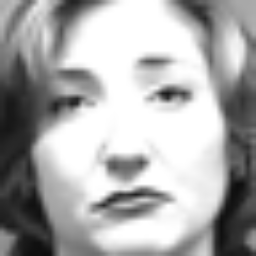


Predicted Class: sadness
Confidence in Prediction: 0.9998907
Actual Class: sadness
__________________________________________________



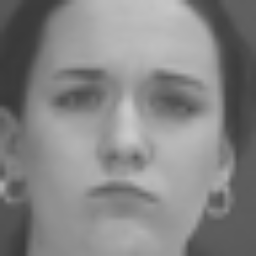


Predicted Class: sadness
Confidence in Prediction: 0.9993837
Actual Class: sadness
__________________________________________________



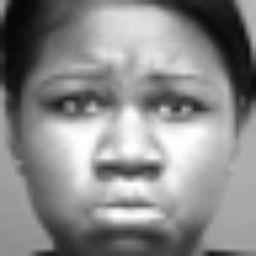


Predicted Class: sadness
Confidence in Prediction: 0.9998116
Actual Class: sadness
__________________________________________________



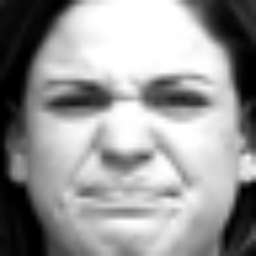


Predicted Class: disgust
Confidence in Prediction: 0.99979085
Actual Class: disgust
__________________________________________________



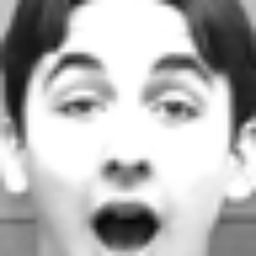


Predicted Class: surprise
Confidence in Prediction: 0.99999976
Actual Class: surprise
__________________________________________________



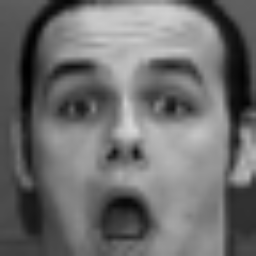


Predicted Class: surprise
Confidence in Prediction: 0.9997764
Actual Class: surprise
__________________________________________________



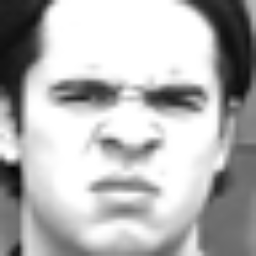


Predicted Class: disgust
Confidence in Prediction: 0.9997428
Actual Class: disgust
__________________________________________________



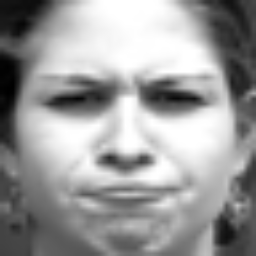


Predicted Class: anger
Confidence in Prediction: 0.9979818
Actual Class: anger
__________________________________________________



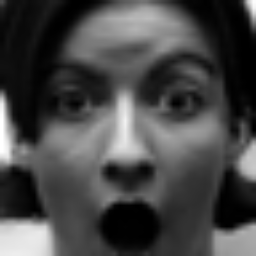


Predicted Class: surprise
Confidence in Prediction: 0.9999479
Actual Class: surprise
__________________________________________________



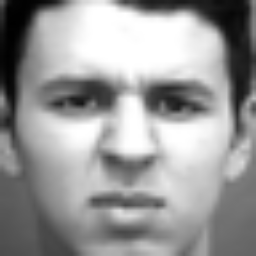


Predicted Class: disgust
Confidence in Prediction: 0.9998387
Actual Class: disgust
__________________________________________________



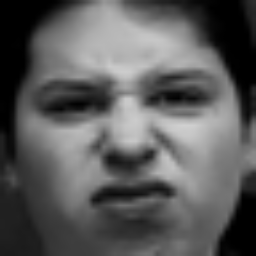


Predicted Class: disgust
Confidence in Prediction: 0.99988604
Actual Class: disgust
__________________________________________________



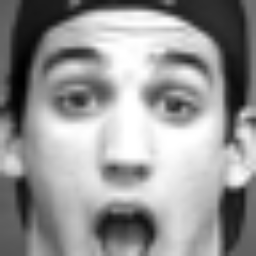


Predicted Class: surprise
Confidence in Prediction: 0.99999714
Actual Class: surprise
__________________________________________________



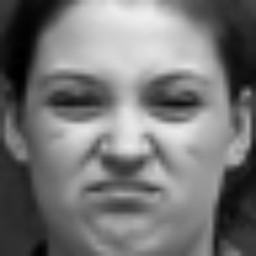


Predicted Class: disgust
Confidence in Prediction: 0.9989172
Actual Class: disgust
__________________________________________________



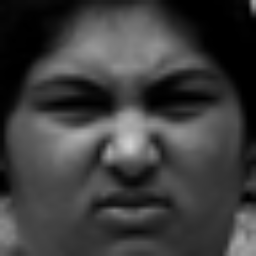


Predicted Class: disgust
Confidence in Prediction: 0.999613
Actual Class: disgust
__________________________________________________



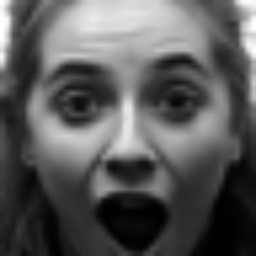


Predicted Class: surprise
Confidence in Prediction: 0.99992514
Actual Class: surprise
__________________________________________________



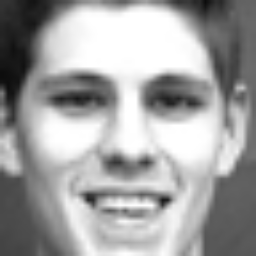


Predicted Class: joy
Confidence in Prediction: 0.9999907
Actual Class: joy
__________________________________________________



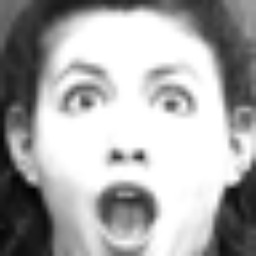


Predicted Class: surprise
Confidence in Prediction: 0.9999956
Actual Class: surprise
__________________________________________________



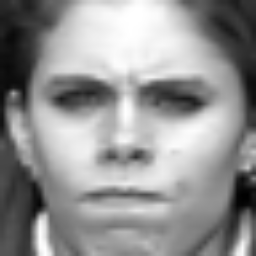


Predicted Class: anger
Confidence in Prediction: 0.99998224
Actual Class: anger
__________________________________________________



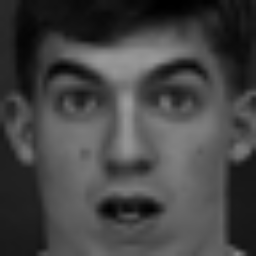


Predicted Class: surprise
Confidence in Prediction: 0.99878377
Actual Class: surprise
__________________________________________________



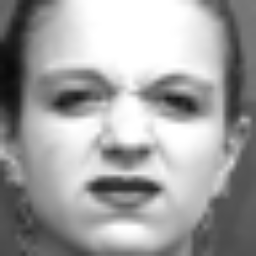


Predicted Class: disgust
Confidence in Prediction: 0.99985635
Actual Class: disgust
__________________________________________________



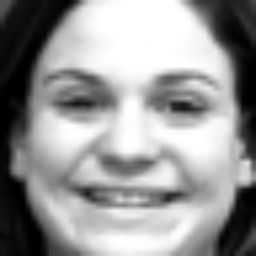


Predicted Class: joy
Confidence in Prediction: 0.9999151
Actual Class: joy
__________________________________________________



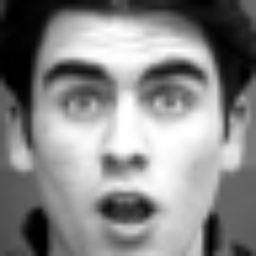


Predicted Class: surprise
Confidence in Prediction: 0.99998105
Actual Class: surprise
__________________________________________________



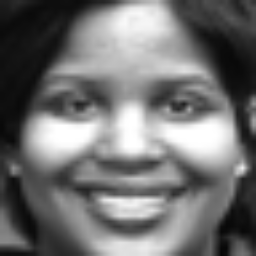


Predicted Class: joy
Confidence in Prediction: 0.9999981
Actual Class: joy
__________________________________________________



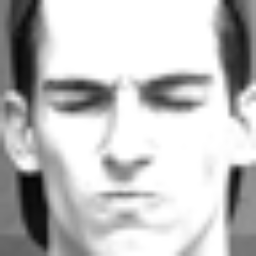


Predicted Class: anger
Confidence in Prediction: 0.9994018
Actual Class: anger
__________________________________________________



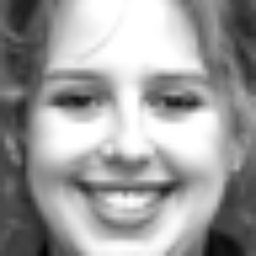


Predicted Class: joy
Confidence in Prediction: 0.9999981
Actual Class: joy
__________________________________________________



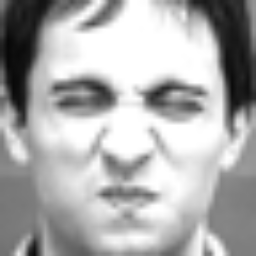


Predicted Class: disgust
Confidence in Prediction: 0.9999032
Actual Class: disgust
__________________________________________________



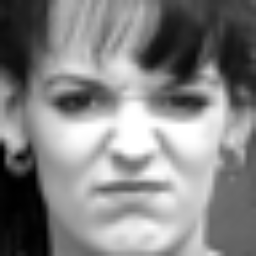


Predicted Class: disgust
Confidence in Prediction: 0.9992693
Actual Class: disgust
__________________________________________________



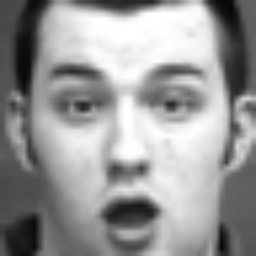


Predicted Class: surprise
Confidence in Prediction: 0.9999814
Actual Class: surprise
__________________________________________________



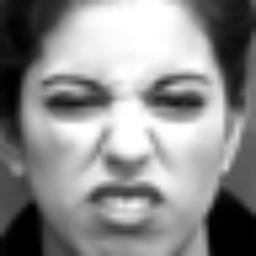


Predicted Class: disgust
Confidence in Prediction: 0.9998154
Actual Class: disgust
__________________________________________________



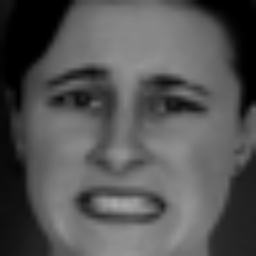


Predicted Class: fear
Confidence in Prediction: 0.99480104
Actual Class: fear
__________________________________________________



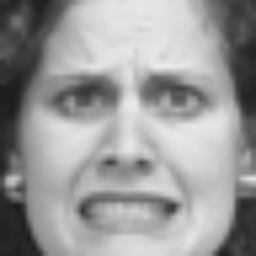


Predicted Class: fear
Confidence in Prediction: 0.9998982
Actual Class: fear
__________________________________________________



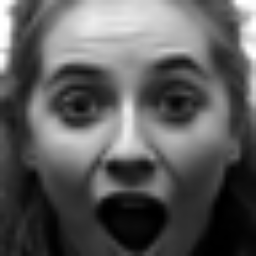


Predicted Class: surprise
Confidence in Prediction: 0.9999274
Actual Class: surprise
__________________________________________________



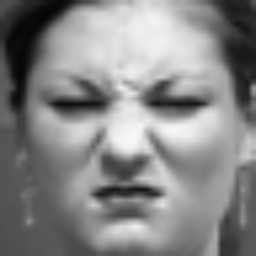


Predicted Class: disgust
Confidence in Prediction: 0.9999702
Actual Class: disgust
__________________________________________________



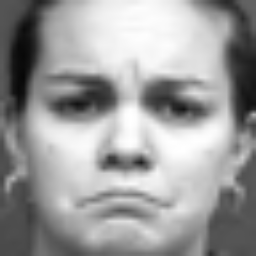


Predicted Class: sadness
Confidence in Prediction: 0.999956
Actual Class: sadness
__________________________________________________



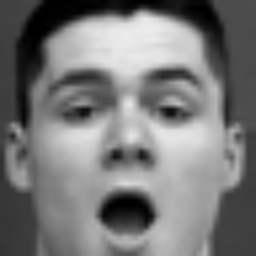


Predicted Class: surprise
Confidence in Prediction: 0.99999535
Actual Class: surprise
__________________________________________________



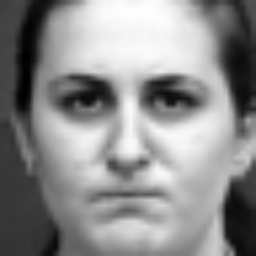


Predicted Class: anger
Confidence in Prediction: 0.96621776
Actual Class: anger
__________________________________________________



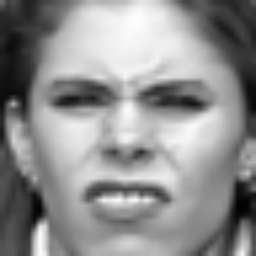


Predicted Class: disgust
Confidence in Prediction: 0.99867105
Actual Class: disgust
__________________________________________________



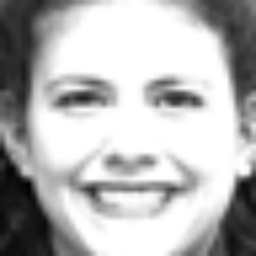


Predicted Class: joy
Confidence in Prediction: 0.99998116
Actual Class: joy
__________________________________________________



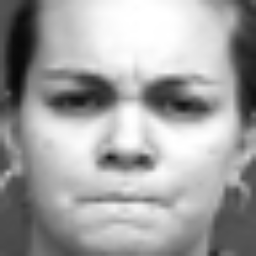


Predicted Class: anger
Confidence in Prediction: 0.99988246
Actual Class: anger
__________________________________________________



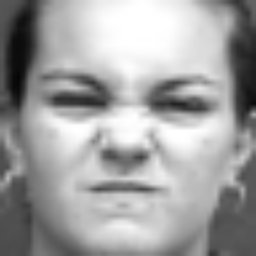


Predicted Class: disgust
Confidence in Prediction: 0.9999813
Actual Class: disgust
__________________________________________________



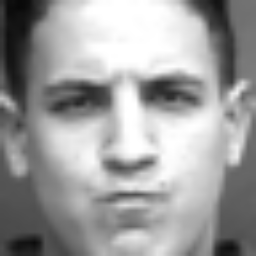


Predicted Class: anger
Confidence in Prediction: 0.99995613
Actual Class: anger
__________________________________________________



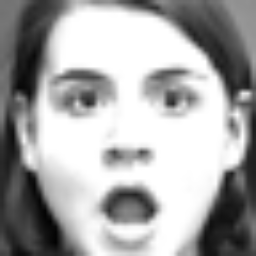


Predicted Class: surprise
Confidence in Prediction: 0.9999987
Actual Class: surprise
__________________________________________________



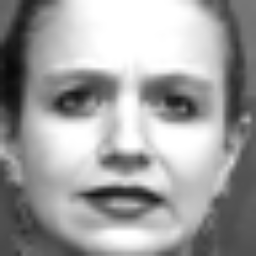


Predicted Class: fear
Confidence in Prediction: 0.9998454
Actual Class: fear
__________________________________________________



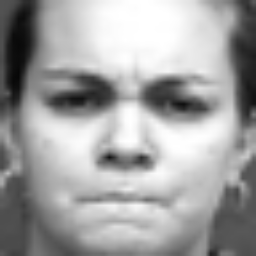


Predicted Class: anger
Confidence in Prediction: 0.9999342
Actual Class: anger
__________________________________________________



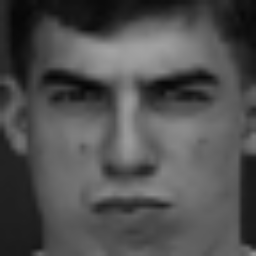


Predicted Class: anger
Confidence in Prediction: 0.99849164
Actual Class: anger
__________________________________________________



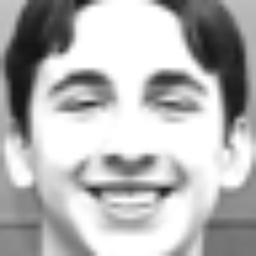


Predicted Class: joy
Confidence in Prediction: 0.9999875
Actual Class: joy
__________________________________________________



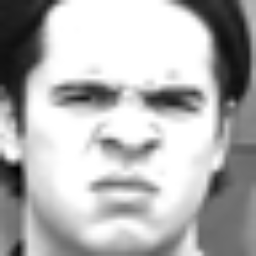


Predicted Class: disgust
Confidence in Prediction: 0.99986696
Actual Class: disgust
__________________________________________________



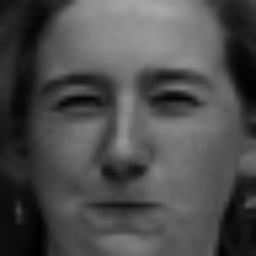


Predicted Class: anger
Confidence in Prediction: 0.9980222
Actual Class: anger
__________________________________________________



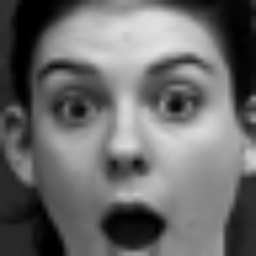


Predicted Class: surprise
Confidence in Prediction: 0.99999654
Actual Class: surprise
__________________________________________________



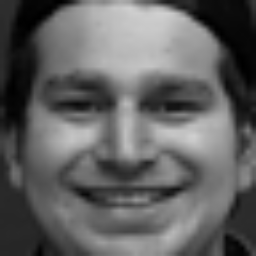


Predicted Class: joy
Confidence in Prediction: 0.9999753
Actual Class: joy
__________________________________________________



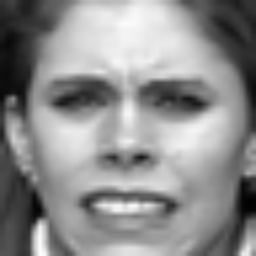


Predicted Class: fear
Confidence in Prediction: 0.99795234
Actual Class: fear
__________________________________________________



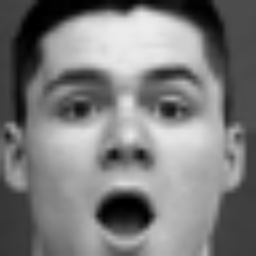


Predicted Class: surprise
Confidence in Prediction: 0.9999939
Actual Class: surprise
__________________________________________________



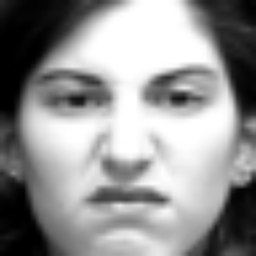


Predicted Class: disgust
Confidence in Prediction: 0.99985695
Actual Class: disgust
__________________________________________________



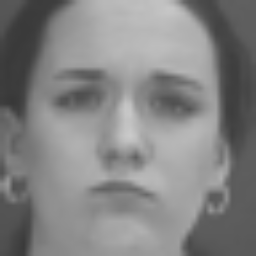


Predicted Class: sadness
Confidence in Prediction: 0.9990012
Actual Class: sadness
__________________________________________________



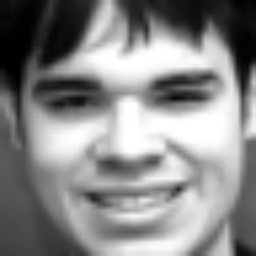


Predicted Class: joy
Confidence in Prediction: 0.9999993
Actual Class: joy
__________________________________________________



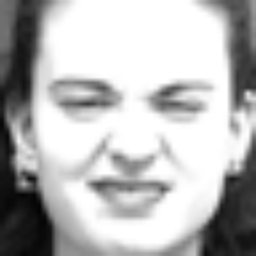


Predicted Class: disgust
Confidence in Prediction: 0.99989045
Actual Class: disgust
__________________________________________________



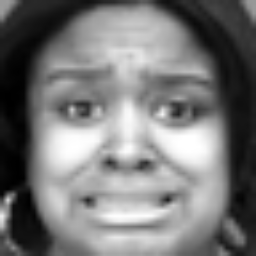


Predicted Class: fear
Confidence in Prediction: 0.99995637
Actual Class: fear
__________________________________________________



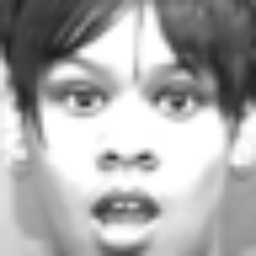


Predicted Class: surprise
Confidence in Prediction: 0.999959
Actual Class: surprise
__________________________________________________



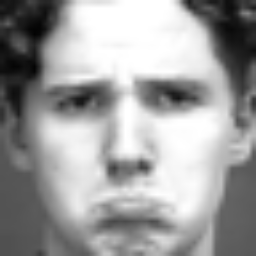


Predicted Class: sadness
Confidence in Prediction: 0.9999409
Actual Class: sadness
__________________________________________________



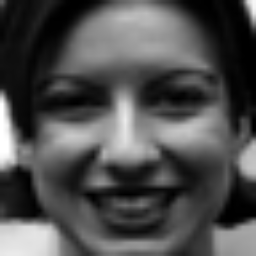


Predicted Class: joy
Confidence in Prediction: 0.9998857
Actual Class: joy
__________________________________________________



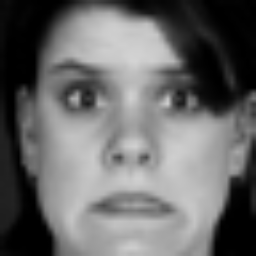


Predicted Class: fear
Confidence in Prediction: 0.99924576
Actual Class: fear
__________________________________________________



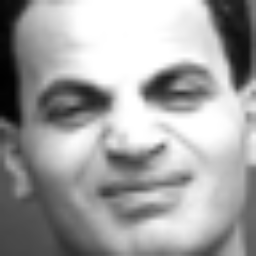


Predicted Class: disgust
Confidence in Prediction: 0.99980706
Actual Class: disgust
__________________________________________________



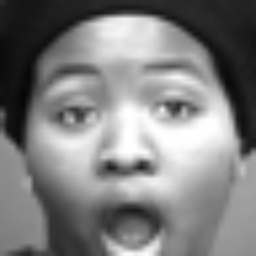


Predicted Class: surprise
Confidence in Prediction: 0.999949
Actual Class: surprise
__________________________________________________



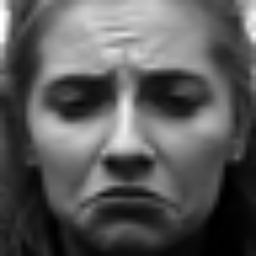


Predicted Class: sadness
Confidence in Prediction: 0.9999901
Actual Class: sadness
__________________________________________________



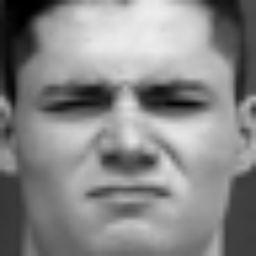


Predicted Class: disgust
Confidence in Prediction: 0.9999405
Actual Class: disgust
__________________________________________________



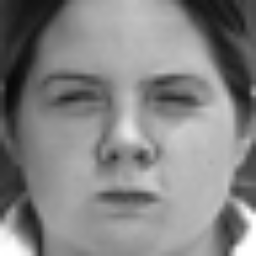


Predicted Class: anger
Confidence in Prediction: 0.99627846
Actual Class: anger
__________________________________________________



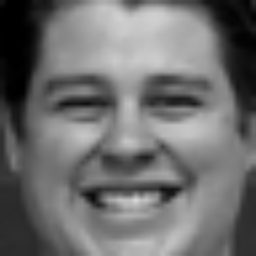


Predicted Class: joy
Confidence in Prediction: 0.99948967
Actual Class: joy
__________________________________________________



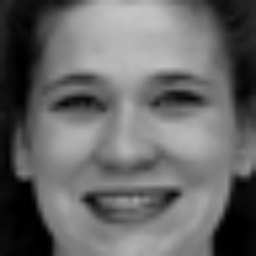


Predicted Class: joy
Confidence in Prediction: 0.99955755
Actual Class: joy
__________________________________________________



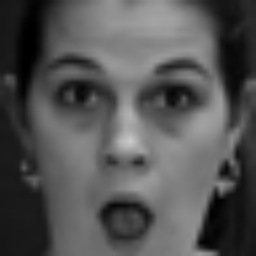


Predicted Class: surprise
Confidence in Prediction: 0.99970645
Actual Class: surprise
__________________________________________________



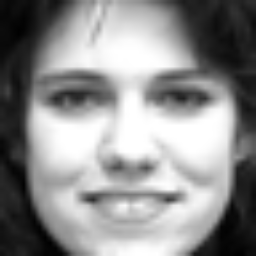


Predicted Class: joy
Confidence in Prediction: 0.9999335
Actual Class: joy
__________________________________________________



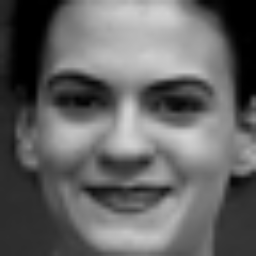


Predicted Class: joy
Confidence in Prediction: 0.9996284
Actual Class: joy
__________________________________________________



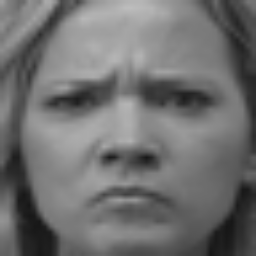


Predicted Class: anger
Confidence in Prediction: 0.9551882
Actual Class: anger
__________________________________________________



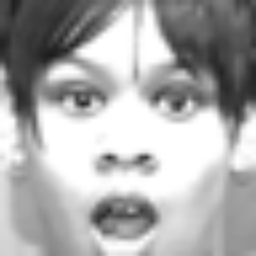


Predicted Class: surprise
Confidence in Prediction: 0.99998903
Actual Class: surprise
__________________________________________________



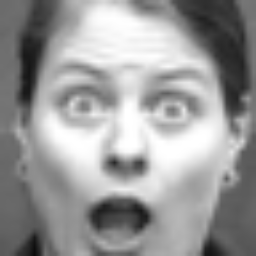


Predicted Class: surprise
Confidence in Prediction: 0.9999975
Actual Class: surprise
__________________________________________________



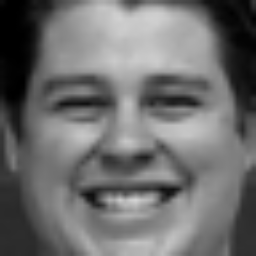


Predicted Class: joy
Confidence in Prediction: 0.99948895
Actual Class: joy
__________________________________________________



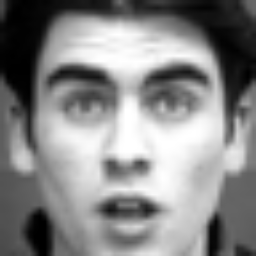


Predicted Class: surprise
Confidence in Prediction: 0.999777
Actual Class: surprise
__________________________________________________



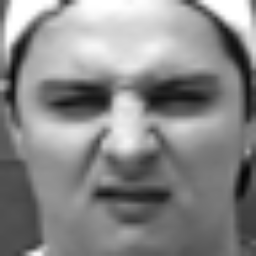


Predicted Class: disgust
Confidence in Prediction: 0.99433917
Actual Class: disgust
__________________________________________________



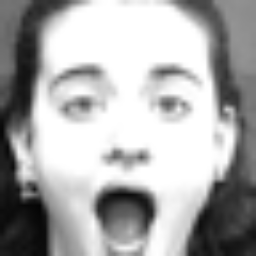


Predicted Class: surprise
Confidence in Prediction: 0.99999607
Actual Class: surprise
__________________________________________________



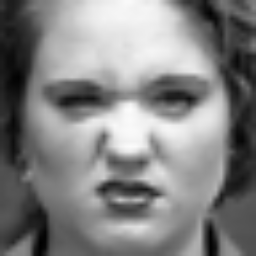


Predicted Class: disgust
Confidence in Prediction: 0.99977905
Actual Class: disgust
__________________________________________________



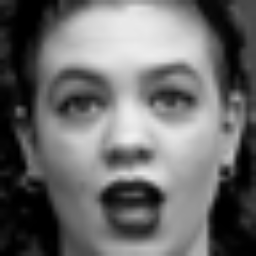


Predicted Class: surprise
Confidence in Prediction: 0.99980146
Actual Class: surprise
__________________________________________________



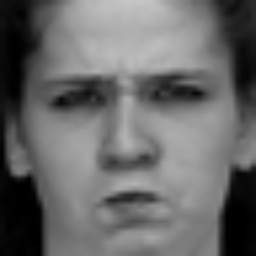


Predicted Class: anger
Confidence in Prediction: 0.99979955
Actual Class: anger
__________________________________________________



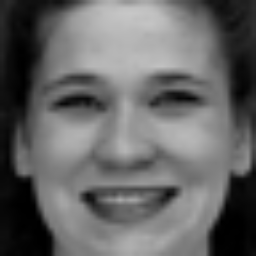


Predicted Class: joy
Confidence in Prediction: 0.9992304
Actual Class: joy
__________________________________________________



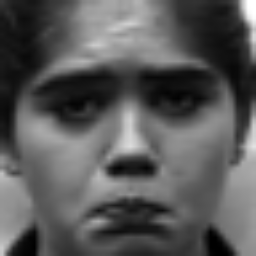


Predicted Class: sadness
Confidence in Prediction: 0.9999546
Actual Class: sadness
__________________________________________________



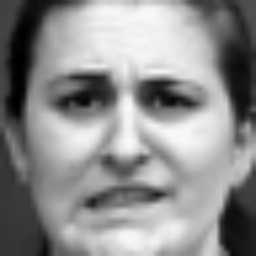


Predicted Class: fear
Confidence in Prediction: 0.9986343
Actual Class: fear
__________________________________________________



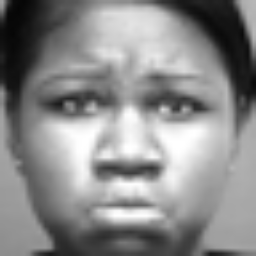


Predicted Class: sadness
Confidence in Prediction: 0.9997632
Actual Class: sadness
__________________________________________________



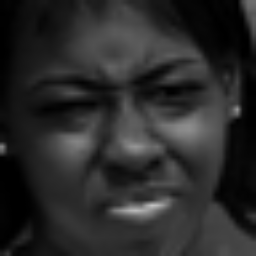


Predicted Class: disgust
Confidence in Prediction: 0.9983924
Actual Class: disgust
__________________________________________________



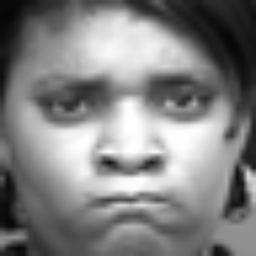


Predicted Class: anger
Confidence in Prediction: 0.99245185
Actual Class: anger
__________________________________________________



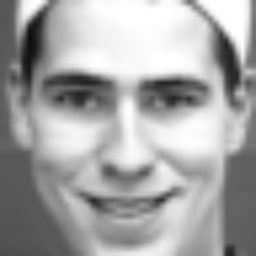


Predicted Class: joy
Confidence in Prediction: 0.99999726
Actual Class: joy
__________________________________________________



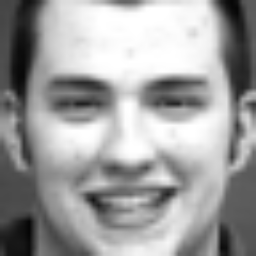


Predicted Class: joy
Confidence in Prediction: 0.9999907
Actual Class: joy
__________________________________________________



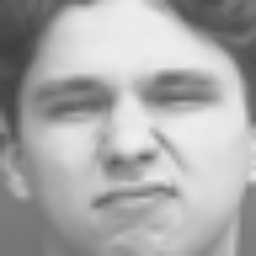


Predicted Class: disgust
Confidence in Prediction: 0.99991214
Actual Class: disgust
__________________________________________________



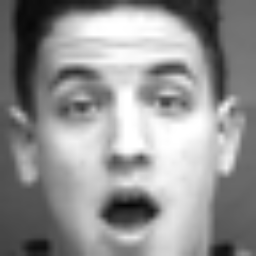


Predicted Class: surprise
Confidence in Prediction: 0.99999654
Actual Class: surprise
__________________________________________________



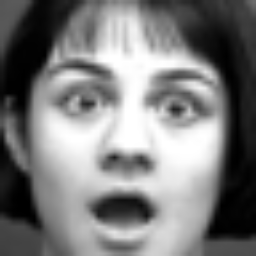


Predicted Class: surprise
Confidence in Prediction: 0.99999785
Actual Class: surprise
__________________________________________________



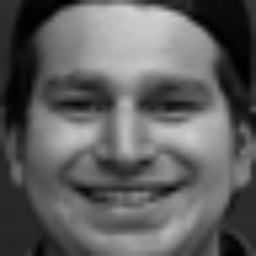


Predicted Class: joy
Confidence in Prediction: 0.99996936
Actual Class: joy
__________________________________________________



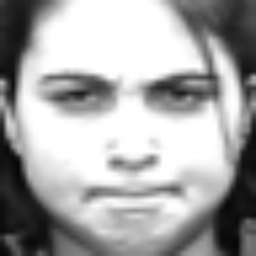


Predicted Class: anger
Confidence in Prediction: 0.99981433
Actual Class: anger
__________________________________________________



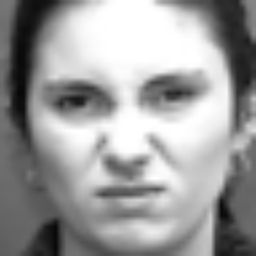


Predicted Class: disgust
Confidence in Prediction: 0.9998411
Actual Class: disgust
__________________________________________________



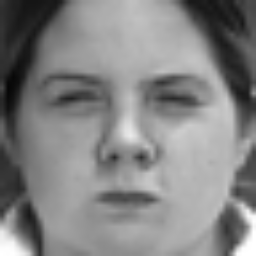


Predicted Class: anger
Confidence in Prediction: 0.9943499
Actual Class: anger
__________________________________________________



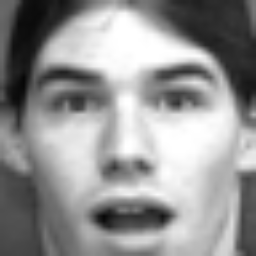


Predicted Class: surprise
Confidence in Prediction: 0.99995124
Actual Class: surprise
__________________________________________________



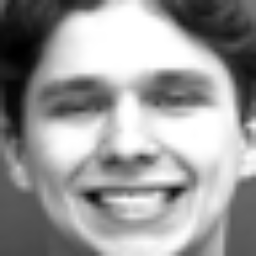


Predicted Class: joy
Confidence in Prediction: 0.99999535
Actual Class: joy
__________________________________________________



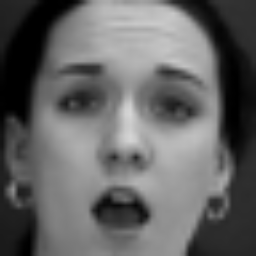


Predicted Class: surprise
Confidence in Prediction: 0.99965835
Actual Class: surprise
__________________________________________________



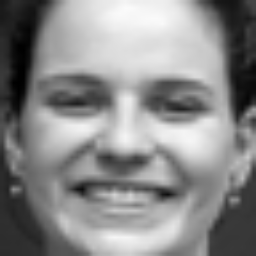


Predicted Class: joy
Confidence in Prediction: 0.9999721
Actual Class: joy
__________________________________________________



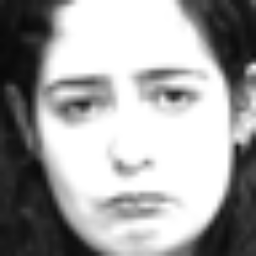


Predicted Class: sadness
Confidence in Prediction: 0.9999058
Actual Class: sadness
__________________________________________________



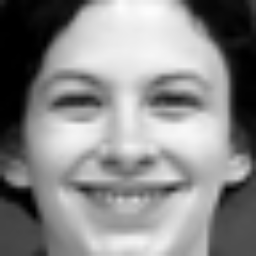


Predicted Class: joy
Confidence in Prediction: 0.99998987
Actual Class: joy
__________________________________________________



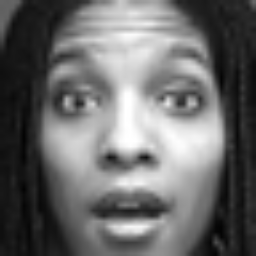


Predicted Class: surprise
Confidence in Prediction: 0.9999646
Actual Class: surprise
__________________________________________________



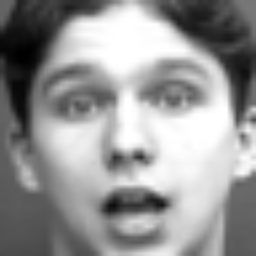


Predicted Class: surprise
Confidence in Prediction: 0.999951
Actual Class: surprise
__________________________________________________



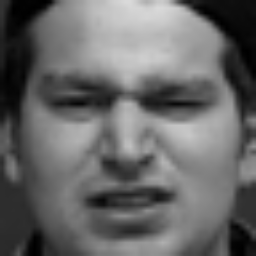


Predicted Class: disgust
Confidence in Prediction: 0.9997336
Actual Class: disgust
__________________________________________________



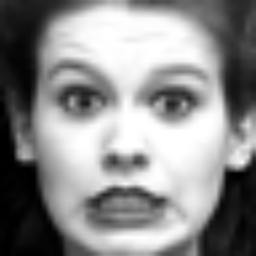


Predicted Class: fear
Confidence in Prediction: 0.9999906
Actual Class: fear
__________________________________________________



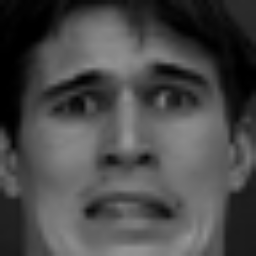


Predicted Class: fear
Confidence in Prediction: 0.9984281
Actual Class: fear
__________________________________________________



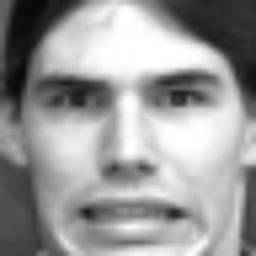


Predicted Class: fear
Confidence in Prediction: 0.9999975
Actual Class: fear
__________________________________________________



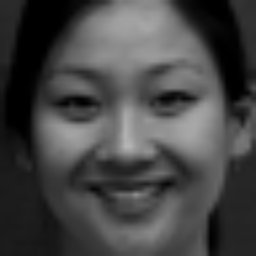


Predicted Class: joy
Confidence in Prediction: 0.99878675
Actual Class: joy
__________________________________________________



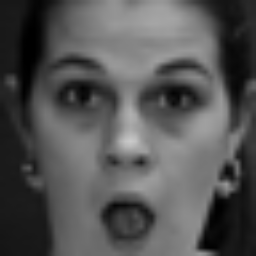


Predicted Class: surprise
Confidence in Prediction: 0.99984384
Actual Class: surprise
__________________________________________________



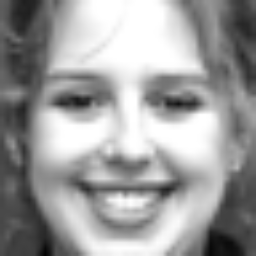


Predicted Class: joy
Confidence in Prediction: 0.9999976
Actual Class: joy
__________________________________________________



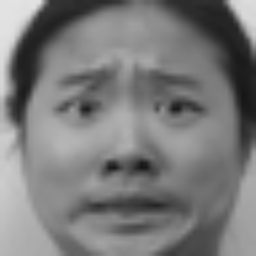


Predicted Class: fear
Confidence in Prediction: 0.9998617
Actual Class: fear
__________________________________________________



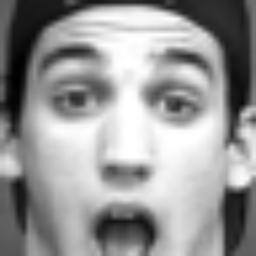


Predicted Class: surprise
Confidence in Prediction: 0.9999902
Actual Class: surprise
__________________________________________________



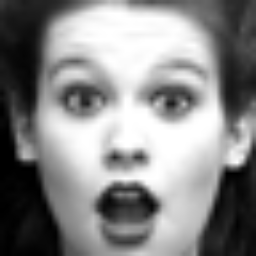


Predicted Class: surprise
Confidence in Prediction: 0.9999652
Actual Class: surprise
__________________________________________________



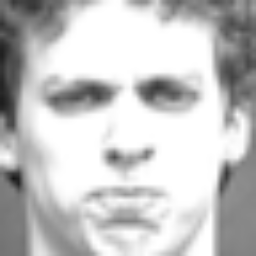


Predicted Class: anger
Confidence in Prediction: 0.99794656
Actual Class: anger
__________________________________________________



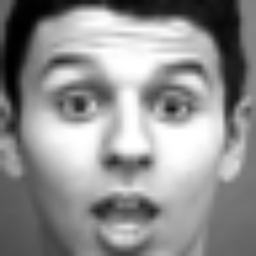


Predicted Class: surprise
Confidence in Prediction: 0.999982
Actual Class: surprise
__________________________________________________



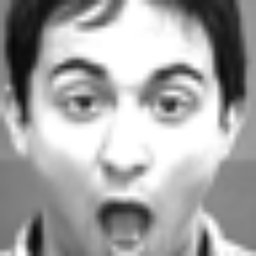


Predicted Class: surprise
Confidence in Prediction: 0.99994206
Actual Class: surprise
__________________________________________________



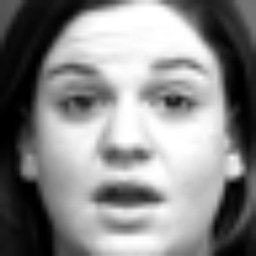


Predicted Class: surprise
Confidence in Prediction: 0.99164635
Actual Class: surprise
__________________________________________________



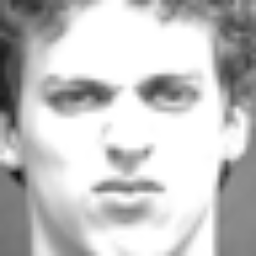


Predicted Class: disgust
Confidence in Prediction: 0.99942696
Actual Class: disgust
__________________________________________________



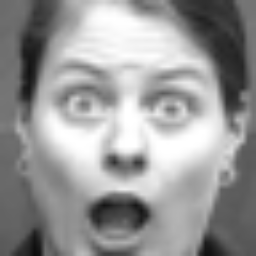


Predicted Class: surprise
Confidence in Prediction: 0.9999951
Actual Class: surprise
__________________________________________________



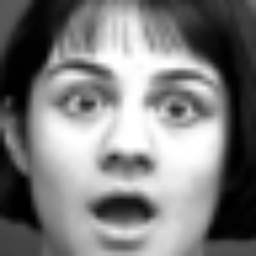


Predicted Class: surprise
Confidence in Prediction: 0.99999547
Actual Class: surprise
__________________________________________________



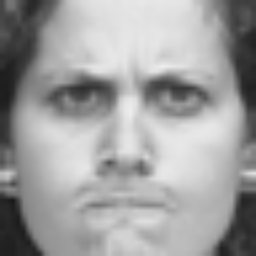


Predicted Class: anger
Confidence in Prediction: 0.99999285
Actual Class: anger
__________________________________________________



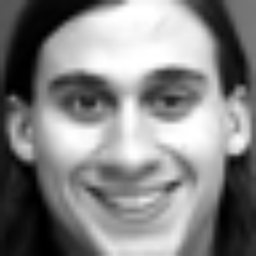


Predicted Class: joy
Confidence in Prediction: 0.9999871
Actual Class: joy
__________________________________________________



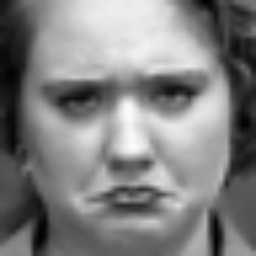


Predicted Class: sadness
Confidence in Prediction: 0.9992487
Actual Class: sadness
__________________________________________________



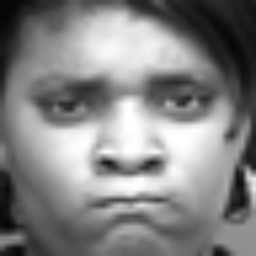


Predicted Class: anger
Confidence in Prediction: 0.9899975
Actual Class: anger
__________________________________________________



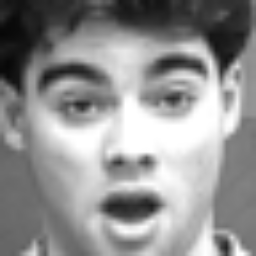


Predicted Class: surprise
Confidence in Prediction: 0.99920493
Actual Class: surprise
__________________________________________________



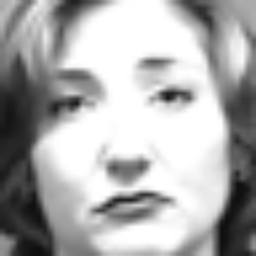


Predicted Class: sadness
Confidence in Prediction: 0.9998746
Actual Class: sadness
__________________________________________________



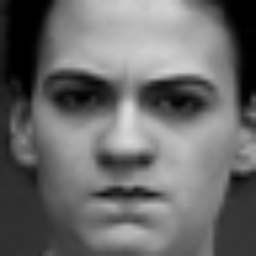


Predicted Class: anger
Confidence in Prediction: 0.94597286
Actual Class: anger
__________________________________________________



In [ ]:
human_predictions, human_probabilities, human_accuracy, human_metrics, human_confusion = test_human_accuracy(model_bottleneck, model_cartoon, human_test)

In [ ]:
human_accuracy

1.0

In [ ]:
human_ct_paths, human_ct_df = get_human_cartoonized_paths()

In [ ]:
im1 = cv2.imread(human_ct_paths[0])

In [ ]:
im1.shape

(256, 256, 3)

In [ ]:
np.asarray(ImageOps.grayscale(Image.fromarray(im1))).shape

(256, 256)

In [ ]:
human_ct_train, human_ct_test = train_test_split(human_ct_df, stratify = human_ct_df["Label"], test_size = 0.3)

In [ ]:
human_images_ct_train, human_labels_ct_train = get_human_cartoonized_images(human_ct_train)
human_images_ct_test, human_labels_ct_test = get_human_cartoonized_images(human_ct_test)

In [ ]:
model_cartoon = train_human(model_bottleneck, model_cartoon, human_images_ct_train, human_labels_ct_train, epochs = 50)

In [ ]:
human_ct_predictions, human_ct_probabilities, human_ct_accuracy, human_ct_metrics, human_ct_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, human_ct_test, display_image=False)

In [ ]:
human_ct_accuracy

1.0

In [ ]:
# get kfold splits
# loop over number of epochs
# train model on data
# track accuracy, precision, recall, f1 on cartoonized images

In [ ]:
human_images_ct, human_labels_ct, human_labels_ct_integers = get_human_cartoonized_images(human_ct_df, integer_labels = True)

# Data Collection

In [32]:
human_ct_paths, human_ct_df = get_human_cartoonized_paths()

In [33]:
class Data:
  percentage = -1
  epoch = -1
  fold_count = -1
  test_predictions = -1
  test_probabilities = -1
  test_accuracy = -1
  test_metrics = -1
  test_confusion = -1
  train_predictions = -1
  train_probabilities = -1
  train_accuracy = -1
  train_metrics = -1
  train_confusion = -1

In [34]:
def train_kfold(human_ct_df, epochs, percentages):
  data_list = []
  for percentage in percentages:
    if (percentage!=100):
      trainer, tester = train_test_split(human_ct_df, stratify = human_ct_df["Label"], test_size = 1-percentage/100)
    else:
      trainer = human_ct_df
      tester = pd.DataFrame(columns = human_ct_df.columns)
    
    skfold = StratifiedKFold(n_splits = 10, shuffle = (percentage == 100))
    human_images_ct, human_labels_ct, human_labels_ct_integers = get_human_cartoonized_images(trainer, integer_labels = True)
    fold_count = 0

    for train_index, test_index in skfold.split(human_images_ct, human_labels_ct_integers):
      train_images, test_images = human_images_ct[train_index], human_images_ct[test_index]
      train_labels, test_labels = human_labels_ct[train_index], human_labels_ct[test_index]
      model_bottleneck, model_cartoon = get_models()

      for epoch in range(epochs):
        print("Training Percentage: " + str(percentage) + " | Fold: " + str(fold_count) + " | Epoch :" + str(epoch))
        data_obj = Data()
        model_cartoon = train_human(model_bottleneck, model_cartoon, train_images, train_labels, epochs = 1)
        test_predictions, test_probabilities, test_accuracy, test_metrics, test_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, pd.concat([trainer.iloc[test_index], tester]), display_image = False)
        train_predictions, train_probabilities, train_accuracy, train_metrics, train_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, trainer.iloc[train_index], display_image = False)
        data_obj.percentage = percentage
        data_obj.epoch = epoch
        data_obj.fold_count = fold_count
        data_obj.test_predictions = test_predictions
        data_obj.test_probabilities = test_probabilities
        data_obj.test_accuracy = test_accuracy
        data_obj.test_metrics = test_metrics
        data_obj.test_confusion = test_confusion
        data_obj.train_predictions = train_predictions
        data_obj.train_probabilities = train_probabilities
        data_obj.train_accuracy = train_accuracy
        data_obj.train_metrics = train_metrics
        data_obj.train_confusion = train_confusion

        data_list.append(data_obj)

        collected = gc.collect()

      fold_count+=1

  return data_list

In [35]:
def train_kfold_augmented(human_ct_df, epochs, percentages):
  data_list = []
  for percentage in percentages:
    if (percentage!=100):
      trainer, tester = train_test_split(human_ct_df, stratify = human_ct_df["Label"], test_size = 1-percentage/100)
      print("not 100")
    else:
      trainer = human_ct_df.sample(frac = 1).reset_index(drop = True)
      tester = pd.DataFrame(columns = human_ct_df.columns)
      print("100")
    print(percentage==100)
    skfold = StratifiedKFold(n_splits = 10, shuffle = (percentage == 100))

    fold_count = 0

    for train_index, test_index in skfold.split(trainer, trainer["Label"]):
      train_images, train_labels = get_human_cartoonized_images(trainer.iloc[train_index], augment = True)
      test_images, test_labels = get_human_cartoonized_images(trainer.iloc[test_index], augment = True)
      model_bottleneck, model_cartoon = get_models()

      for epoch in range(epochs):
        print("Training Percentage: " + str(percentage) + " | Fold: " + str(fold_count) + " | Epoch: " + str(epoch))
        data_obj = Data()
        model_cartoon = train_human(model_bottleneck, model_cartoon, train_images, train_labels, epochs = 1)
        test_predictions, test_probabilities, test_accuracy, test_metrics, test_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, pd.concat([trainer.iloc[test_index], tester]), display_image = False, augment = True)
        train_predictions, train_probabilities, train_accuracy, train_metrics, train_confusion = test_human_cartoonized_accuracy(model_bottleneck, model_cartoon, trainer.iloc[train_index], display_image = False, augment = True)
        
        data_obj.percentage = percentage
        data_obj.epoch = epoch
        data_obj.fold_count = fold_count
        data_obj.test_predictions = test_predictions
        data_obj.test_probabilities = test_probabilities
        data_obj.test_accuracy = test_accuracy
        data_obj.test_metrics = test_metrics
        data_obj.test_confusion = test_confusion
        data_obj.train_predictions = train_predictions
        data_obj.train_probabilities = train_probabilities
        data_obj.train_accuracy = train_accuracy
        data_obj.train_metrics = train_metrics
        data_obj.train_confusion = train_confusion

        print(test_accuracy)
        print(train_accuracy)

        data_list.append(data_obj)

        collected = gc.collect()

      fold_count+=1
      

  return data_list

In [36]:
# for i in [100]:
#   data_augmented_newer = train_kfold_augmented(human_ct_df, epochs = 10, percentages=[i])
  # file_name = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_augmented_new" + str(i) + ".pkl"
  # open_file = open(file_name, "wb")
  # pickle.dump(data_augmented, open_file)
  # open_file.close()

In [37]:
# file_name = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_augmented_newer.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(data_augmented_newer, open_file)
# open_file.close()

In [38]:
# for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
#   data_augmented = train_kfold(human_ct_df, epochs = 10, percentages=[i])
#   file_name = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented_new" + str(i) + ".pkl"
#   open_file = open(file_name, "wb")
#   pickle.dump(data_augmented, open_file)
#   open_file.close()

In [39]:

# file_name = "data_90_100.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(data, open_file)
# open_file.close()
# files.download(file_name) 

In [40]:
# data_unaugmented = []
# for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
#   file_name = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented_new" + str(i) + ".pkl"
#   with open(file_name, 'rb') as f:
#     data_unaugmented += pickle.load(f)
#   open_file.close()

In [41]:
file_name1 = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_augmented_final.pkl"
file_name2 = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented_final.pkl"
file_name3 = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented_newer.pkl"
file_name4 = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_augmented_newer.pkl"

with open(file_name1, 'rb') as f:
  data_augmented = pickle.load(f)
with open(file_name2, 'rb') as f:
  data_unaugmented = pickle.load(f)
with open(file_name3, 'rb') as f:
  data_unaugmented_newer = pickle.load(f)
with open(file_name4, 'rb') as f:
  data_augmented_newer = pickle.load(f)

data_augmented[900:1000] = data_augmented_newer
data_unaugmented[900:1000] = data_unaugmented_newer

In [42]:
# 27 - # Add image augmentation stuff, get all data
# 28 - # Plot all graphs, re-write the abstract, intro and methodologies
# 28 - # Write the pre-processing, dataset used, etc. sections
# 28 - # Compile into google doc document
# 29 - # Make IEEE Format

In [43]:
# filename = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_augmented.pkl"
# with open(filename, 'rb') as f:
#     data_augmented = pickle.load(f)

# filename = "/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/data_unaugmented.pkl"
# with open(filename, 'rb') as f:
#     data_unaugmented = pickle.load(f)

In [44]:
data_augmented[0].test_metrics[2]

0.4296981736523346

In [45]:
list(data_augmented[0].__dict__.keys())

['percentage',
 'epoch',
 'fold_count',
 'test_predictions',
 'test_probabilities',
 'test_accuracy',
 'test_metrics',
 'test_confusion',
 'train_predictions',
 'train_probabilities',
 'train_accuracy',
 'train_metrics',
 'train_confusion']

In [46]:
# Plots:
# For 10 epochs, 10-fold median training and testing accuracies for augmented and unaugmented for each percentage of data [total 10 plots]
# Make dataframe with fold median training, testing accuracies, together with different labels for augmented and unaugmented for each percentage sepearately for each epoch

In [47]:
columns_list = ["Epoch", "Augmented_Training_Accuracy", "Augmented_Testing_Accuracy", "Augmented_Testing_FScore", "Unaugmented_Training_Accuracy", "Unaugmented_Testing_Accuracy", "Unaugmented_Testing_FScore"]

In [48]:
def get_dataframe(df_percentage):
  data_df = pd.DataFrame(columns = columns_list)

  for epoch_index in range(10):
    training_accuracy_unaugmented = []
    testing_accuracy_unaugmented = []
    testing_fscore_unaugmented = []
    training_accuracy_augmented = []
    testing_accuracy_augmented = []
    testing_fscore_augmented = []

    for index in range(epoch_index, len(data_unaugmented), 10):
      if (data_unaugmented[index].percentage != df_percentage):
        continue

      training_accuracy_unaugmented.append(data_unaugmented[index].train_accuracy)
      testing_accuracy_unaugmented.append(data_unaugmented[index].test_accuracy)
      training_accuracy_augmented.append(data_augmented[index].train_accuracy)
      testing_accuracy_augmented.append(data_augmented[index].test_accuracy)
      testing_fscore_augmented.append(data_augmented[index].test_metrics[2])
      testing_fscore_unaugmented.append(data_unaugmented[index].test_metrics[2])
    
    training_accuracy_augmented = median(training_accuracy_augmented)
    training_accuracy_unaugmented = median(training_accuracy_unaugmented)
    testing_accuracy_augmented = median(testing_accuracy_augmented)
    testing_accuracy_unaugmented = median(testing_accuracy_unaugmented)
    testing_fscore_augmented = median(testing_fscore_augmented)
    testing_fscore_unaugmented = median(testing_fscore_unaugmented)

    df2 = {'Epoch': epoch_index, 
           'Augmented_Training_Accuracy': training_accuracy_augmented, 
           'Augmented_Testing_Accuracy': testing_accuracy_augmented, 
           'Unaugmented_Training_Accuracy': training_accuracy_unaugmented, 
           'Unaugmented_Testing_Accuracy': testing_accuracy_unaugmented,
           'Augmented_Testing_FScore': testing_fscore_augmented,
           'Unaugmented_Testing_FScore': testing_fscore_unaugmented}

    data_df = data_df.append(df2, ignore_index = True)

  return data_df

In [49]:
data_df_10 = get_dataframe(10)
data_df_20 = get_dataframe(20)
data_df_30 = get_dataframe(30)
data_df_40 = get_dataframe(40)
data_df_50 = get_dataframe(50)
data_df_60 = get_dataframe(60)
data_df_70 = get_dataframe(70)
data_df_80 = get_dataframe(80)
data_df_90 = get_dataframe(90)
data_df_100 = get_dataframe(100)

data_df_list = [data_df_10, data_df_20, data_df_30, data_df_40, data_df_50, data_df_60, data_df_70, data_df_80, data_df_90, data_df_100]

In [50]:
data_df_90

Epoch  ...  Unaugmented_Testing_FScore
0    0.0  ...                    0.655492
1    1.0  ...                    0.859459
2    2.0  ...                    0.900189
3    3.0  ...                    0.936363
4    4.0  ...                    0.968590
5    5.0  ...                    0.983057
6    6.0  ...                    0.988643
7    7.0  ...                    0.988707
8    8.0  ...                    0.991506
9    9.0  ...                    0.988712

[10 rows x 7 columns]

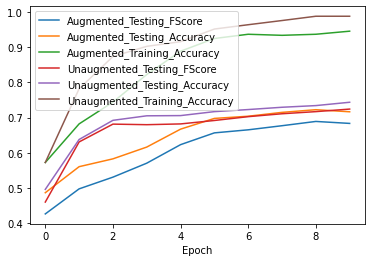

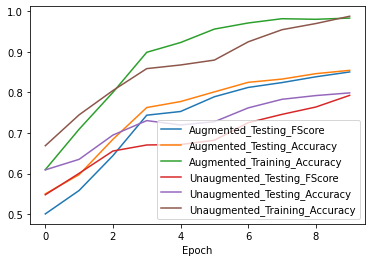

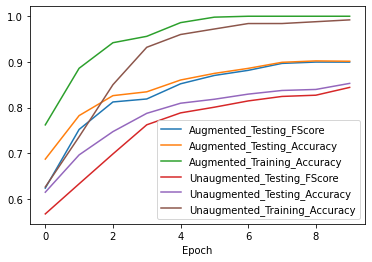

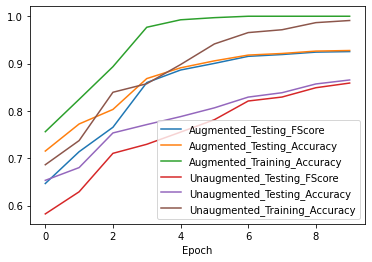

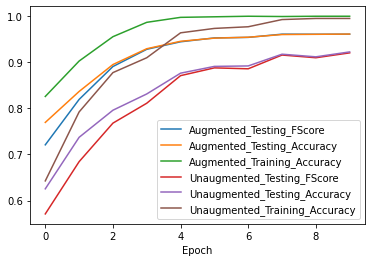

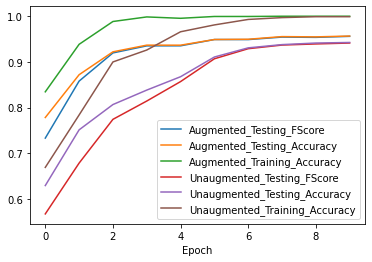

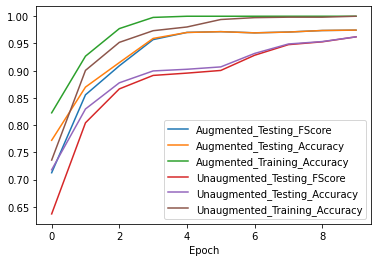

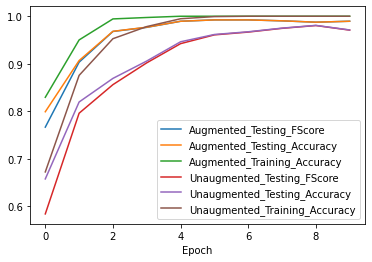

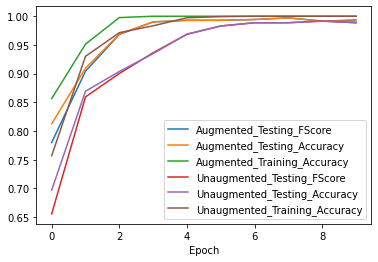

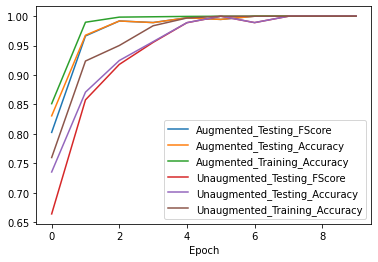

In [51]:
count = 10
for i in data_df_list:
  figure = i.plot(x ='Epoch', y=['Augmented_Testing_FScore', 'Augmented_Testing_Accuracy', 'Augmented_Training_Accuracy', 'Unaugmented_Testing_FScore', 'Unaugmented_Testing_Accuracy', 'Unaugmented_Training_Accuracy'], kind = 'line')
  # fig = figure.get_figure()
  # fig.savefig("/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/Plots/Plot_" + str(count) + '.jpg')
  count+=10

In [52]:
df2 = pd.DataFrame(columns = ['Percentage', 'Maximum Augmented Accuracy', 'Maximum Unaugmented Accuracy', 'Augmented Weighted FScore', 'Unaugmented Weighted FScore'])
for index, df in list(enumerate(data_df_list)):
  if (index == 9):
    break
  print(str((index+1)*10) + " Percentage:")
  print(str(df["Augmented_Testing_Accuracy"].iloc[-1]) + ", " + str(df["Unaugmented_Testing_Accuracy"].iloc[-1]))
  df2 = df2.append({
      'Percentage': (index+1)*10,
      'Maximum Augmented Accuracy': round(df["Augmented_Testing_Accuracy"].iloc[-1], 3),
      'Maximum Unaugmented Accuracy': round(df["Unaugmented_Testing_Accuracy"].iloc[-1], 3),
      'Augmented Weighted FScore': round(df['Augmented_Testing_FScore'].iloc[-1], 3),
      'Unaugmented Weighted FScore': round(df['Unaugmented_Testing_FScore'].iloc[-1], 3)
  }, ignore_index = True)

10 Percentage:
0.7164004879553549, 0.7434834123222749
20 Percentage:
0.8546052631578948, 0.7989487516425755
30 Percentage:
0.9014032496307238, 0.8529144415407339
40 Percentage:
0.9276094276094276, 0.8653198653198653
50 Percentage:
0.9613119220290856, 0.9226238440581711
60 Percentage:
0.9566744730679156, 0.9426229508196722
70 Percentage:
0.9745639534883721, 0.9622093023255814
80 Percentage:
0.9894378131447097, 0.9711538461538461
90 Percentage:
0.9914852978941961, 0.9887005649717514


In [53]:
df2.to_csv("/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/results.csv")

In [54]:
df2

Percentage  ...  Unaugmented Weighted FScore
0        10.0  ...                        0.724
1        20.0  ...                        0.793
2        30.0  ...                        0.844
3        40.0  ...                        0.859
4        50.0  ...                        0.921
5        60.0  ...                        0.941
6        70.0  ...                        0.962
7        80.0  ...                        0.971
8        90.0  ...                        0.989

[9 rows x 5 columns]

In [55]:
# human_paths, human_df = get_human_paths()
# human_images, human_labels = get_human_images(human_df)
# human_images_ct, human_labels_ct = get_human_cartoonized_images(human_ct_df)

In [56]:
paths = glob.glob("/content/drive/MyDrive/Capstone/anime/animated2/Saved_Data/comparison/*.png")

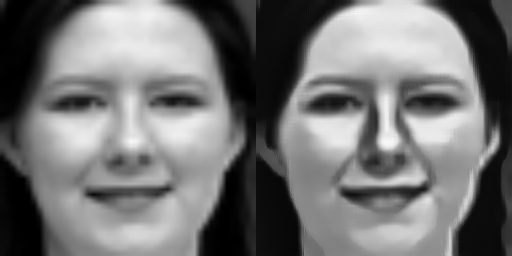

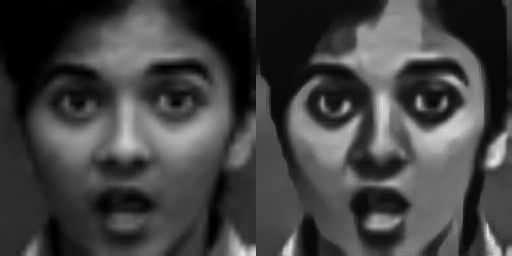

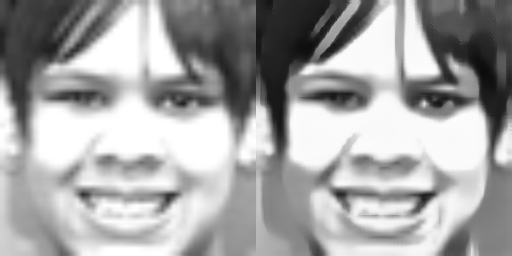

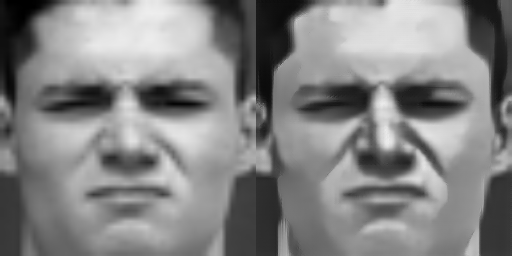

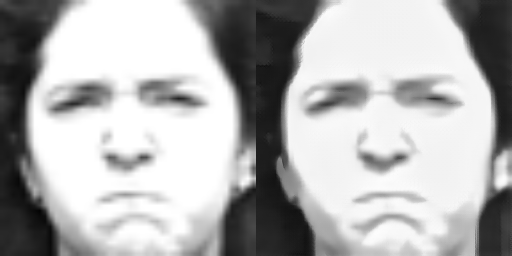

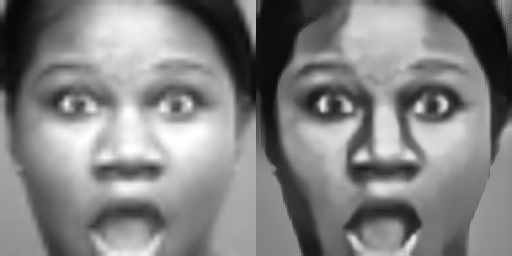

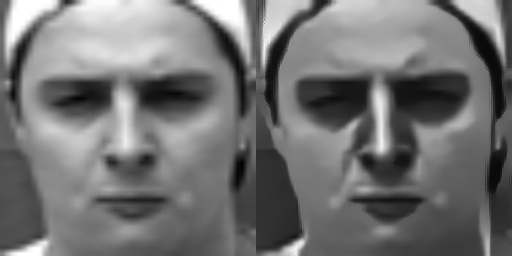

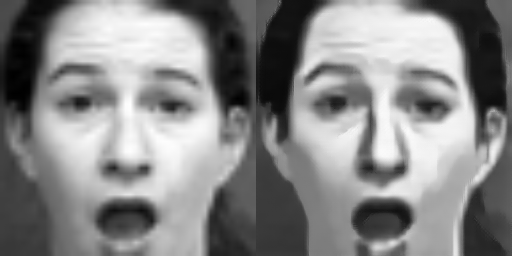

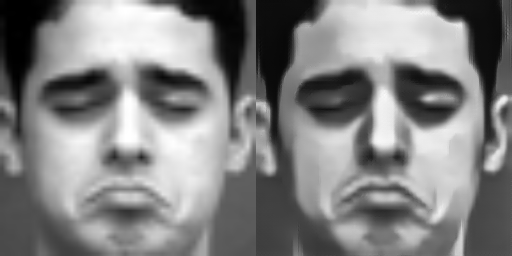

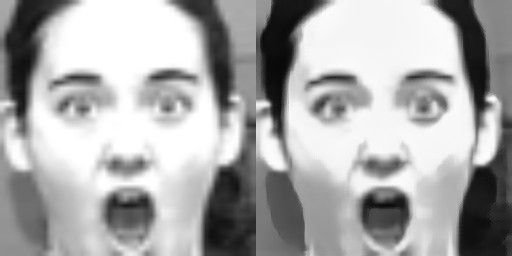

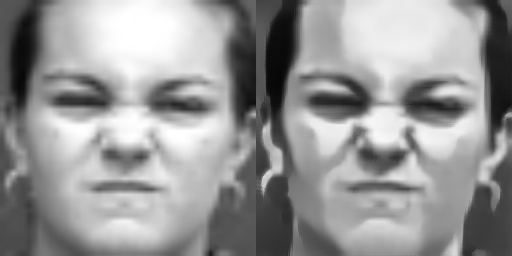

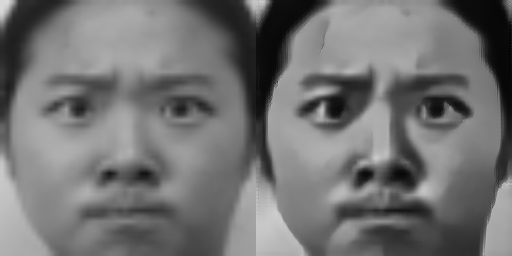

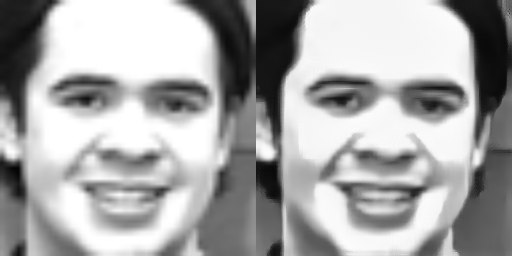

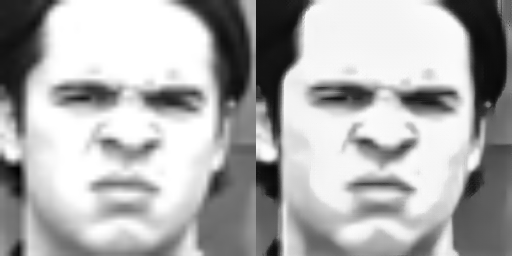

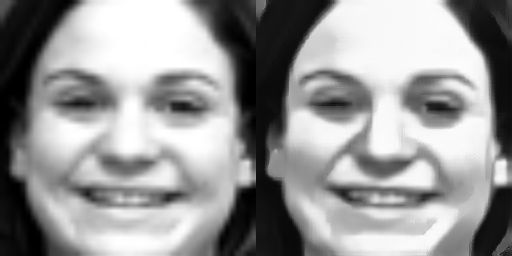

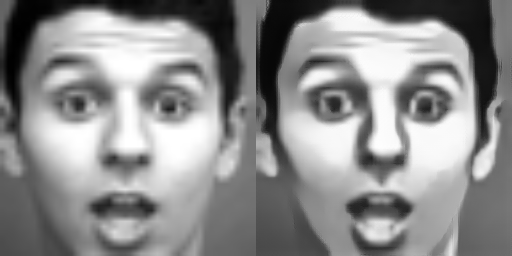

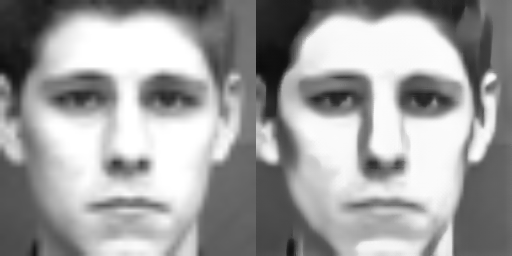

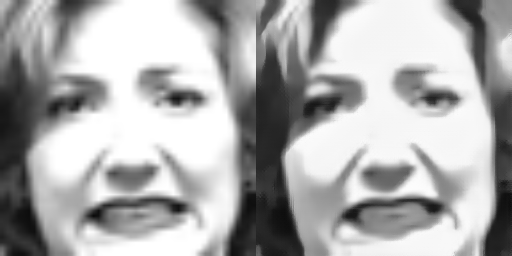

In [57]:
for i in paths:
  display(ImageOps.grayscale(Image.fromarray(cv2.imread(i))))

In [57]:
file_name = "data_augmented.pkl"
file_name2 = "data_unaugmented.pkl"
open_file = open(file_name, "wb")
pickle.dump(data_augmented, open_file)
open_file.close()
open_file = open(file_name2, "wb")
pickle.dump(data_unaugmented, open_file)
open_file.close()